# Risk analytics in banking and financial services

In [130]:
#Import necessary liberaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [131]:
import warnings
warnings.filterwarnings('ignore')

In [132]:
# Set option for view more rows and columns.
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)

In [4]:
#Reading the application dataset
app_data=pd.read_csv(R"C:\Users\kvsba\Downloads\EDA Credit Case Study\application_data.csv")

In [5]:
app_data.shape

(307511, 122)

In [6]:
app_data.head(500)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0        100002       1         Cash loans           M            N   
1        100003       0         Cash loans           F            N   
2        100004       0    Revolving loans           M            Y   
3        100006       0         Cash loans           F            N   
4        100007       0         Cash loans           M            N   
5        100008       0         Cash loans           M            N   
6        100009       0         Cash loans           F            Y   
7        100010       0         Cash loans           M            Y   
8        100011       0         Cash loans           F            N   
9        100012       0    Revolving loans           M            N   
10       100014       0         Cash loans           F            N   
11       100015       0         Cash loans           F            N   
12       100016       0         Cash loans           F            N   
13       100017       0         Cash loans           M            Y   
14       100018       0         Cash loans           F            N   
15       100019       0         Cash loans           M            Y   
16       100020       0         Cash loans           M            N   
17       100021       0    Revolving loans           F            N   
18       100022       0    Revolving loans           F            N   
19       100023       0         Cash loans           F            N   
20       100024       0    Revolving loans           M            Y   
21       100025       0         Cash loans           F            Y   
22       100026       0         Cash loans           F            N   
23       100027       0         Cash loans           F            N   
24       100029       0         Cash loans           M            Y   
25       100030       0         Cash loans           F            N   
26       100031       1         Cash loans           F            N   
27       100032       0         Cash loans           M            N   
28       100033       0         Cash loans           M            Y   
29       100034       0    Revolving loans           M            N   
30       100035       0         Cash loans           F            N   
31       100036       0         Cash loans           F            N   
32       100037       0         Cash loans           F            N   
33       100039       0         Cash loans           M            Y   
34       100040       0         Cash loans           F            N   
35       100041       0         Cash loans           F            N   
36       100043       0         Cash loans           F            N   
37       100044       0         Cash loans           M            N   
38       100045       0         Cash loans           F            N   
39       100046       0    Revolving loans           M            Y   
40       100047       1         Cash loans           M            N   
41       100048       0         Cash loans           F            N   
42       100049       1         Cash loans           F            N   
43       100050       0         Cash loans           F            N   
44       100051       0         Cash loans           M            N   
45       100052       0    Revolving loans           F            N   
46       100053       0         Cash loans           F            N   
47       100054       0         Cash loans           F            N   
48       100055       0         Cash loans           F            N   
49       100056       0         Cash loans           M            Y   
50       100058       0    Revolving loans           F            N   
51       100059       0         Cash loans           M            Y   
52       100060       0         Cash loans           M            Y   
53       100061       0         Cash loans           F            N   
54       100062       0         Cash loans           M            Y   
55       100063       0      

In [7]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [8]:
app_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [9]:
app_data.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

In [10]:
app_data.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


In [11]:
app_data.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [12]:
((app_data.isnull().sum()/app_data.shape[0]*100)>40).value_counts()

False    73
True     49
Name: count, dtype: int64

In [13]:
app_data.columns[(app_data.isnull().sum()/app_data.shape[0]*100>40)]

Index(['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI',
       'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
       'NONLIVINGAREA_MEDI', 'FO

In [14]:
#Dropping the columns more than 40% null values
drop=app_data.columns[(app_data.isnull().sum()/app_data.shape[0]*100>40)]

In [15]:
app_data.drop(columns=drop,axis=1,inplace=True)

In [16]:
app_data.shape

(307511, 73)

In [17]:
app_data.isnull().sum().sort_values(ascending=False)

OCCUPATION_TYPE                96391
EXT_SOURCE_3                   60965
AMT_REQ_CREDIT_BUREAU_YEAR     41519
AMT_REQ_CREDIT_BUREAU_QRT      41519
AMT_REQ_CREDIT_BUREAU_MON      41519
AMT_REQ_CREDIT_BUREAU_WEEK     41519
AMT_REQ_CREDIT_BUREAU_DAY      41519
AMT_REQ_CREDIT_BUREAU_HOUR     41519
NAME_TYPE_SUITE                 1292
OBS_30_CNT_SOCIAL_CIRCLE        1021
DEF_30_CNT_SOCIAL_CIRCLE        1021
OBS_60_CNT_SOCIAL_CIRCLE        1021
DEF_60_CNT_SOCIAL_CIRCLE        1021
EXT_SOURCE_2                     660
AMT_GOODS_PRICE                  278
AMT_ANNUITY                       12
CNT_FAM_MEMBERS                    2
DAYS_LAST_PHONE_CHANGE             1
FLAG_DOCUMENT_17                   0
FLAG_DOCUMENT_18                   0
FLAG_DOCUMENT_21                   0
FLAG_DOCUMENT_20                   0
FLAG_DOCUMENT_19                   0
FLAG_DOCUMENT_2                    0
FLAG_DOCUMENT_3                    0
FLAG_DOCUMENT_4                    0
FLAG_DOCUMENT_5                    0
F

In [18]:
app_data.OCCUPATION_TYPE.value_counts()

OCCUPATION_TYPE
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: count, dtype: int64

In [19]:
#Instead of filling the mode and  filling ""unknown" is better apporach
app_data["OCCUPATION_TYPE"]=app_data.OCCUPATION_TYPE.fillna("Unknown")

In [20]:
app_data.OCCUPATION_TYPE.value_counts()

OCCUPATION_TYPE
Unknown                  96391
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: count, dtype: int64

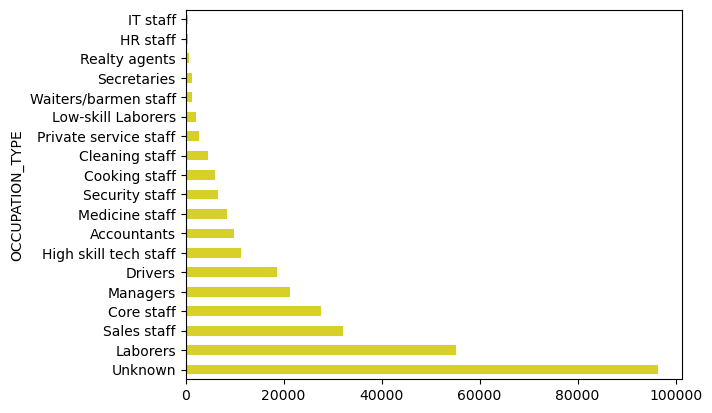

In [21]:
#plotting bar chart and find more and less occupations types
app_data.OCCUPATION_TYPE.value_counts().plot.barh(color="#d6d029")
plt.show()

In [22]:
app_data.EXT_SOURCE_3.value_counts()

EXT_SOURCE_3
0.746300    1460
0.713631    1315
0.694093    1276
0.670652    1191
0.652897    1154
            ... 
0.021492       1
0.019468       1
0.023062       1
0.014556       1
0.043227       1
Name: count, Length: 814, dtype: int64

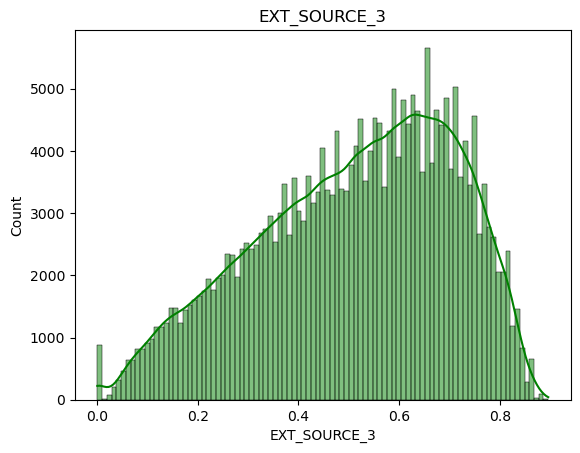

In [23]:
#plotting hist of ext source 3
sns.histplot(app_data, x=app_data['EXT_SOURCE_3'], kde=True, color='g')
plt.title('EXT_SOURCE_3')
plt.show()

In [24]:
app_data.EXT_SOURCE_3.median()

0.5352762504724826

In [25]:
x=app_data.EXT_SOURCE_3.mean()
x

0.5108529061799658

In [26]:
#Here graph is negative skewed then fill with median
app_data['EXT_SOURCE_3']=app_data.EXT_SOURCE_3.fillna(x)

In [27]:
app_data.EXT_SOURCE_3.mean()

0.5108529061799658

In [28]:
app_data.EXT_SOURCE_3.isnull().sum()

0

In [29]:
AMT_Null=['AMT_REQ_CREDIT_BUREAU_YEAR','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_HOUR']

In [30]:
#All the AMT REQ CREDIT BUREAU Columns are filled with respictive column median
app_data.fillna(app_data[AMT_Null].median(),inplace = True)

In [31]:
app_data.isnull().sum().sort_values(ascending=False)

NAME_TYPE_SUITE                1292
DEF_60_CNT_SOCIAL_CIRCLE       1021
OBS_30_CNT_SOCIAL_CIRCLE       1021
DEF_30_CNT_SOCIAL_CIRCLE       1021
OBS_60_CNT_SOCIAL_CIRCLE       1021
EXT_SOURCE_2                    660
AMT_GOODS_PRICE                 278
AMT_ANNUITY                      12
CNT_FAM_MEMBERS                   2
DAYS_LAST_PHONE_CHANGE            1
FLAG_DOCUMENT_2                   0
FLAG_DOCUMENT_10                  0
EXT_SOURCE_3                      0
FLAG_DOCUMENT_3                   0
FLAG_DOCUMENT_4                   0
FLAG_DOCUMENT_5                   0
FLAG_DOCUMENT_6                   0
FLAG_DOCUMENT_7                   0
FLAG_DOCUMENT_8                   0
FLAG_DOCUMENT_9                   0
SK_ID_CURR                        0
FLAG_DOCUMENT_11                  0
FLAG_DOCUMENT_20                  0
AMT_REQ_CREDIT_BUREAU_QRT         0
AMT_REQ_CREDIT_BUREAU_MON         0
AMT_REQ_CREDIT_BUREAU_WEEK        0
AMT_REQ_CREDIT_BUREAU_DAY         0
AMT_REQ_CREDIT_BUREAU_HOUR  

<Axes: xlabel='NAME_TYPE_SUITE'>

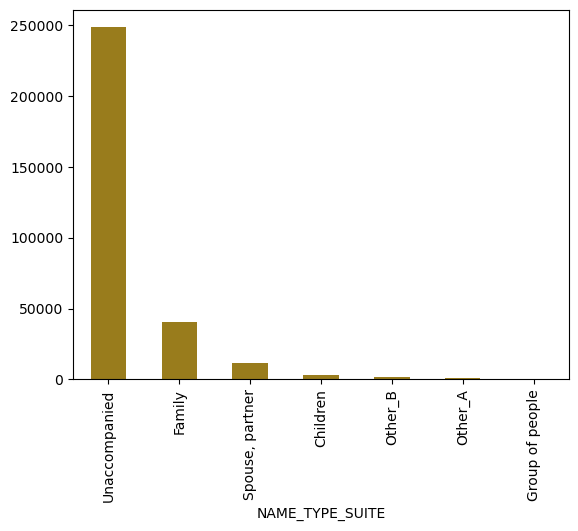

In [32]:
#Define the family type of client
app_data.NAME_TYPE_SUITE.value_counts().plot.bar(color="#997c1c")

In [33]:
app_data.NAME_TYPE_SUITE.value_counts()

NAME_TYPE_SUITE
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: count, dtype: int64

In [34]:
#fill the null values with mode value
app_data.NAME_TYPE_SUITE.fillna('Unaccompanied')

0         Unaccompanied
1                Family
2         Unaccompanied
3         Unaccompanied
4         Unaccompanied
              ...      
307506    Unaccompanied
307507    Unaccompanied
307508    Unaccompanied
307509    Unaccompanied
307510    Unaccompanied
Name: NAME_TYPE_SUITE, Length: 307511, dtype: object

In [35]:
app_data.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
FLAG_MOBIL                       int64
FLAG_EMP_PHONE                   int64
FLAG_WORK_PHONE                  int64
FLAG_CONT_MOBILE                 int64
FLAG_PHONE               

<Axes: xlabel='count', ylabel='NAME_CONTRACT_TYPE'>

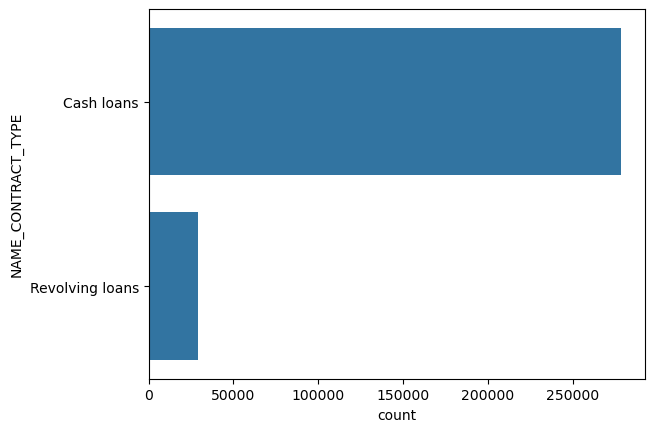

In [36]:
#Find the count of cash and revolving loans
sns.countplot(app_data.NAME_CONTRACT_TYPE)

In [37]:
#Replace the null with Female because less null are negligiable
app_data['CODE_GENDER'].replace("XNA","F",inplace=True)

In [38]:
app_data['CODE_GENDER'].value_counts()

CODE_GENDER
F    202452
M    105059
Name: count, dtype: int64

In [39]:
app_data['CODE_GENDER'].value_counts(normalize=True)

CODE_GENDER
F    0.658357
M    0.341643
Name: proportion, dtype: float64

<Axes: ylabel='count'>

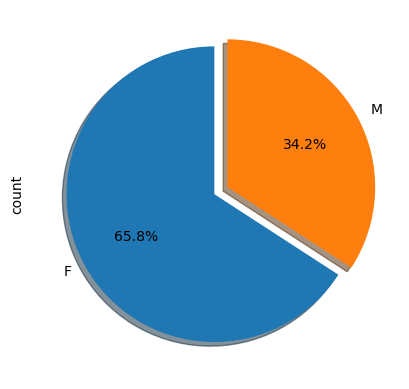

In [40]:
#plot pie chart of male and female along with percentage.
labels='F','M'
explode = (0, 0.1)

app_data['CODE_GENDER'].value_counts().plot.pie(explode=explode,labels=labels,autopct='%1.1f%%',shadow=True, startangle=90)

<Axes: ylabel='FLAG_OWN_CAR'>

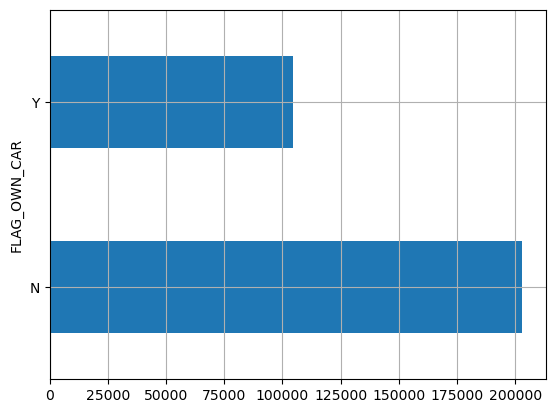

In [41]:
#Bar graph of person with and without car.
app_data['FLAG_OWN_CAR'].value_counts().plot.barh(grid=True)

<Axes: xlabel='count', ylabel='FLAG_OWN_REALTY'>

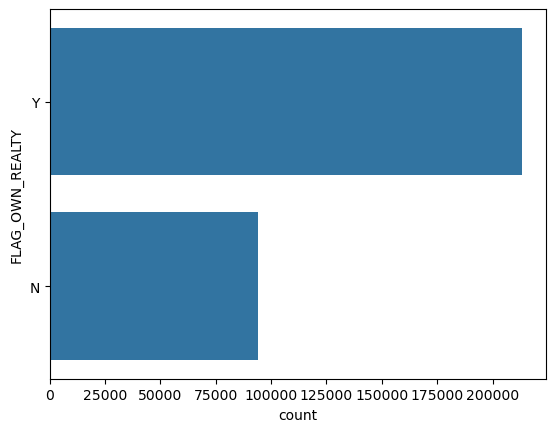

In [42]:
#count the person with and without house.
sns.countplot(app_data['FLAG_OWN_REALTY'])

In [43]:
app_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_C

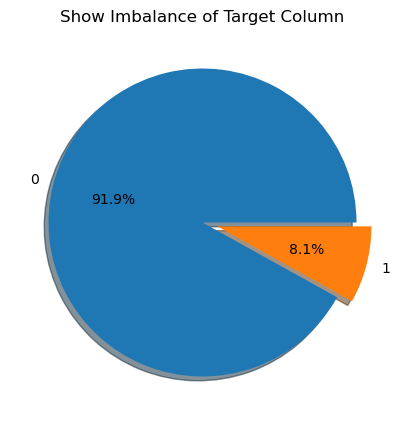

In [44]:
## Checking data imbalance
target = app_data['TARGET'].value_counts()

# Create a pie chart
plt.figure(figsize=(5, 5))
explode=(0, 0.1)
plt.pie(target,explode=explode,labels=target.index, autopct='%1.1f%%',shadow=True)
plt.title('Show Imbalance of Target Column')
plt.show()

Text(0, 0.5, 'Price of goods')

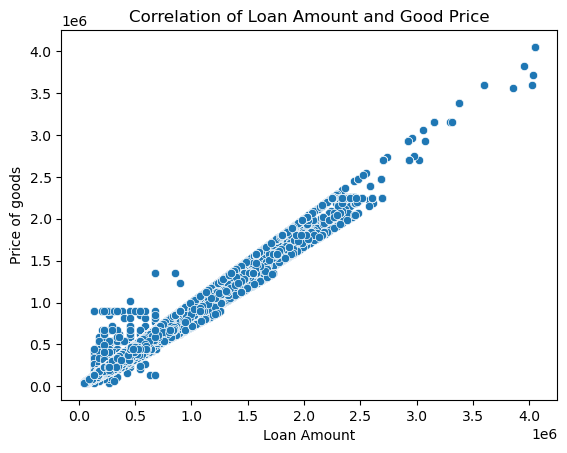

In [45]:
#Here the person request loan for good purchesee shows a strong positive correlation.
sns.scatterplot(x=app_data["AMT_CREDIT"],y=app_data['AMT_GOODS_PRICE'],data=app_data)
plt.title("Correlation of Loan Amount and Good Price")
plt.xlabel("Loan Amount")
plt.ylabel("Price of goods")

In [46]:
#Understand the organization entitys
app_data["ORGANIZATION_TYPE"].value_counts()

ORGANIZATION_TYPE
Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7      

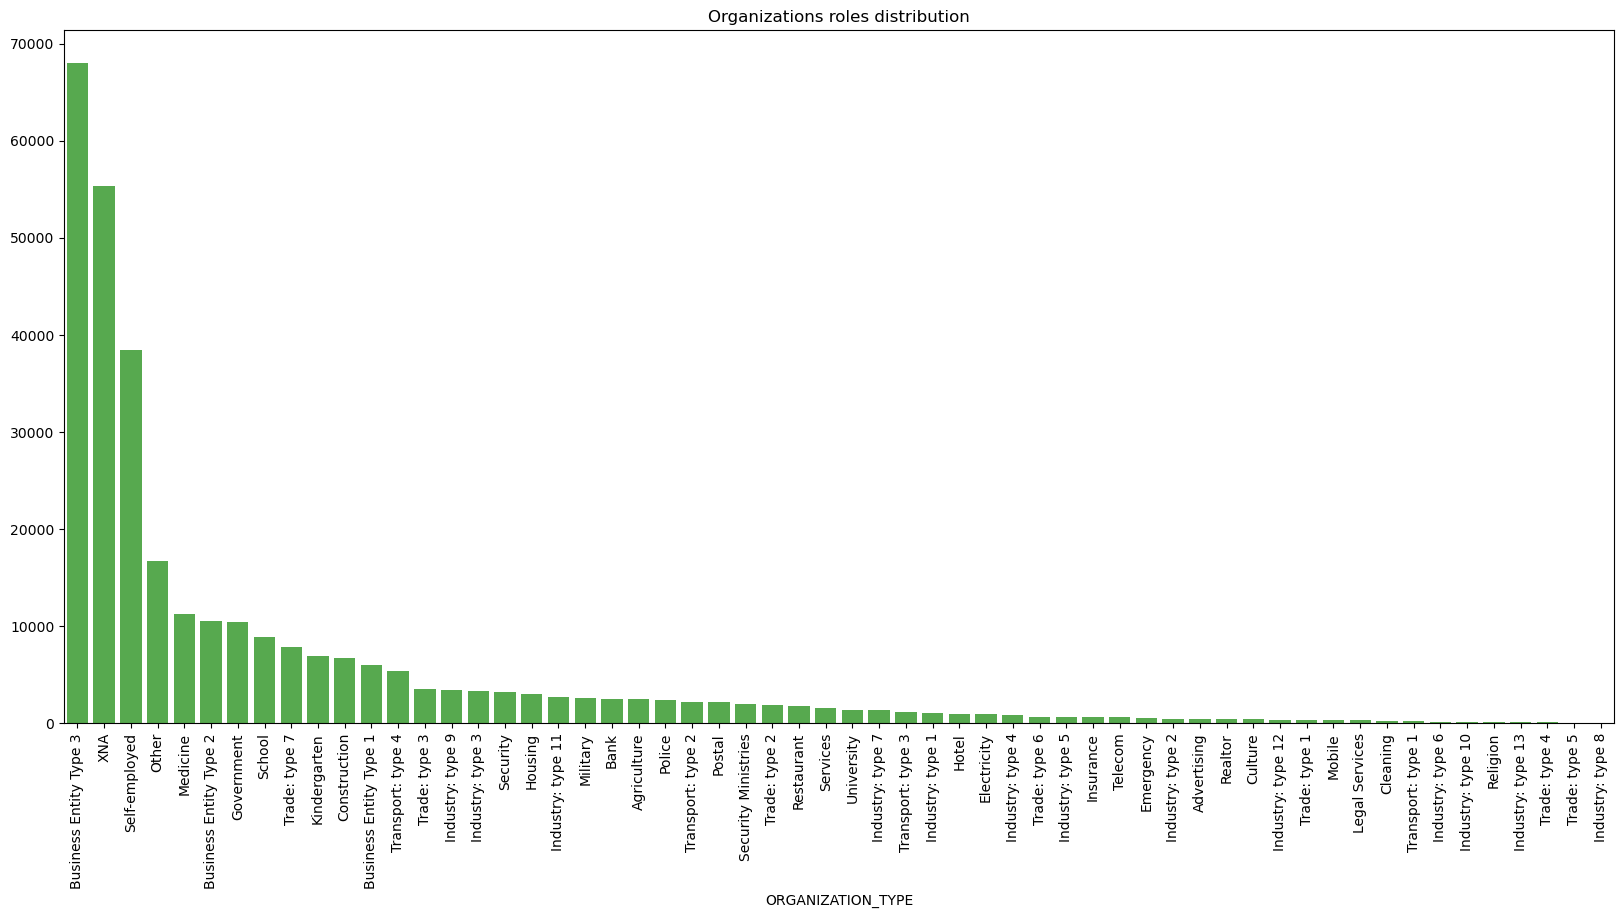

In [47]:
# Plot it for better understanding
plt.figure(figsize=[20,9])
sns.barplot(x=app_data["ORGANIZATION_TYPE"].value_counts().index,y=app_data["ORGANIZATION_TYPE"].value_counts().values,color="#4ab840")
plt.title("Organizations roles distribution")
plt.xticks(rotation=90)
plt.show()

In [48]:
#In data set we observed that days aare printed with negative sign
app_data.DAYS_BIRTH.unique()

array([ -9461, -16765, -19046, ...,  -7951,  -7857, -25061], dtype=int64)

In [49]:
#Change the respective columns with absolute value
days=['DAYS_BIRTH','DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH']
for i in days:
    app_data[i]=abs(app_data[i])

In [50]:
app_data.DAYS_BIRTH.unique()

array([ 9461, 16765, 19046, ...,  7951,  7857, 25061], dtype=int64)

In [136]:
###  perform univariant analysis wrt target column

In [137]:
def check_target(app_data,column1,column2=None):
    fig, axes=plt.subplots(1, 2, figsize=(14,6))
    sns.countplot(data=app_data,x=column1,palette='Set1',ax=axes[0])
    axes[0].set_title(f'{column1}')
    axes[0].set_xlabel(column1)
    axes[0].set_yscale("log")
    axes[0].set_ylabel("count")
    axes[0].tick_params(rotation=45)
    if column2:
        sns.countplot(data=app_data,x=column2,hue="TARGET",palette='Set1',ax=axes[1])
        axes[1].set_title(f'{column2}')
        axes[1].set_xlabel(column2)
        axes[1].set_yscale("log")
        axes[1].set_ylabel("count")
        axes[1].tick_params(rotation=45)
    plt.tight_layout()
    plt.show()

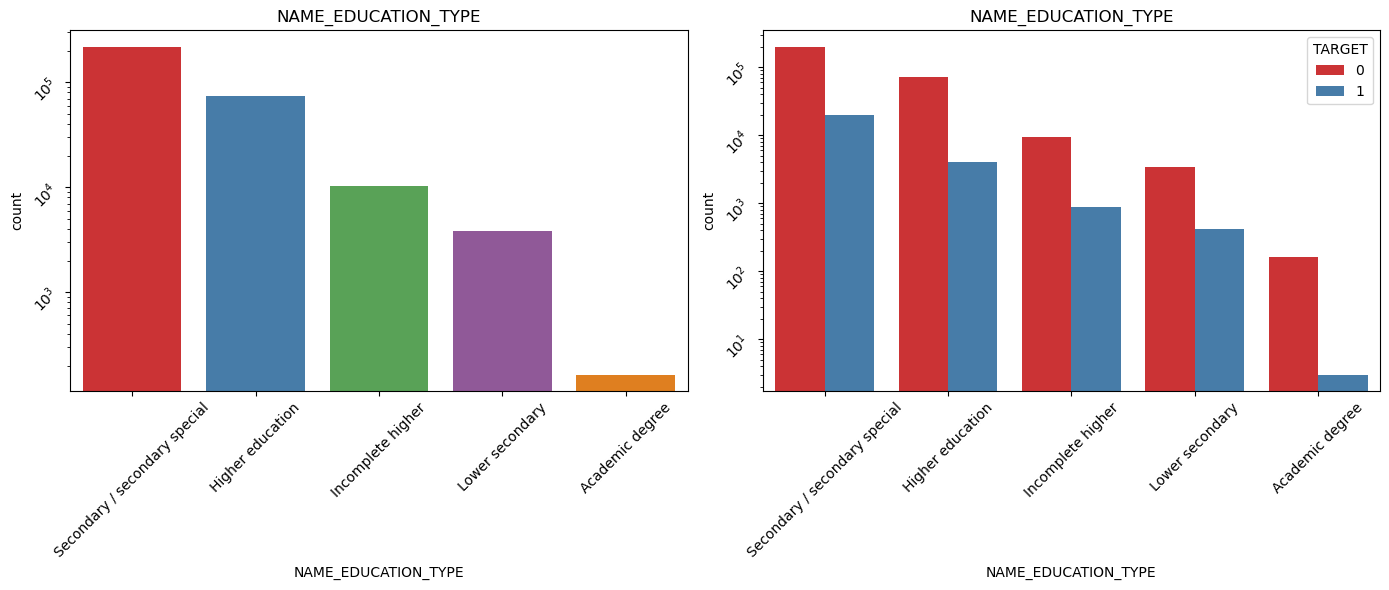

In [52]:
check_target(app_data,'NAME_EDUCATION_TYPE', 'NAME_EDUCATION_TYPE')

In [ ]:
### Secondary education as more number of client and defaulter too

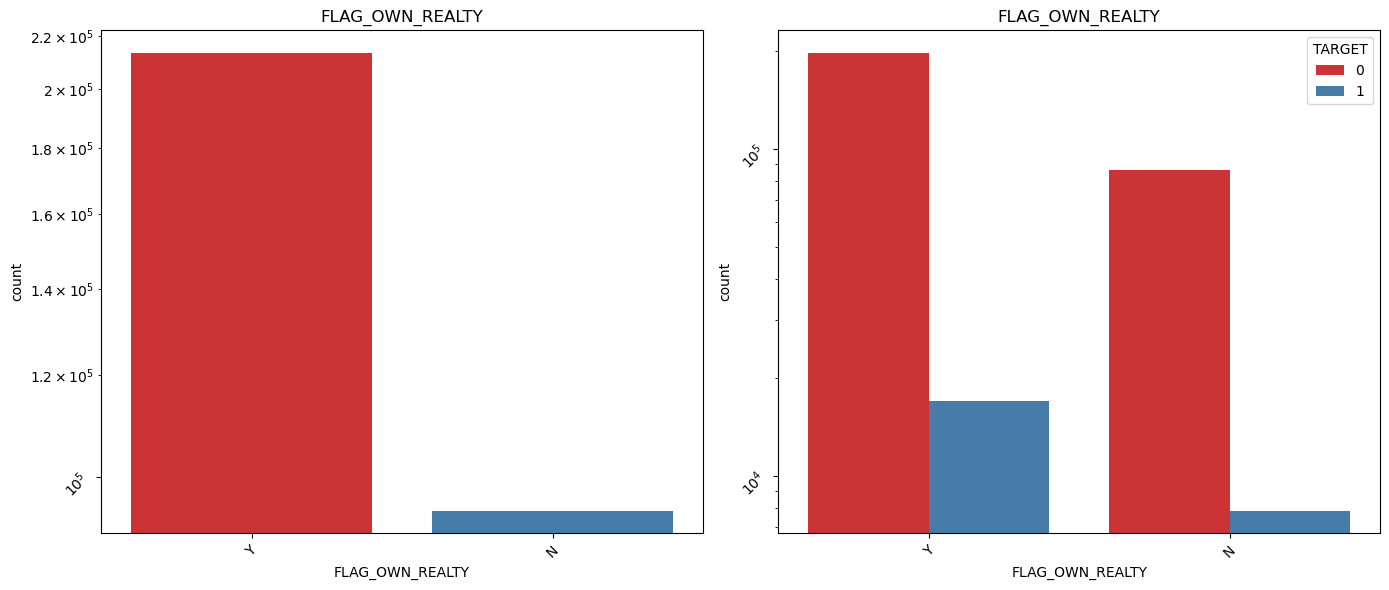

In [53]:
check_target(app_data,'FLAG_OWN_REALTY',"FLAG_OWN_REALTY")

In [ ]:
### Person with no house has more repayers  and less defalturs.

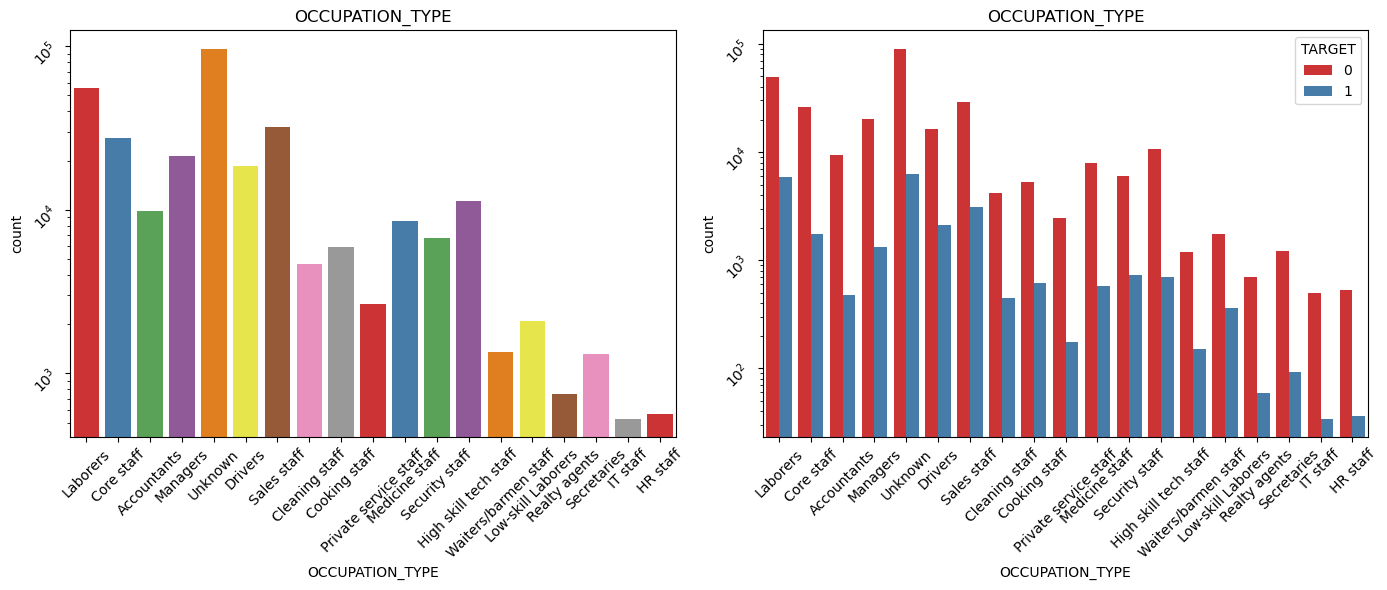

In [54]:
check_target(app_data,'OCCUPATION_TYPE',"OCCUPATION_TYPE")

In [ ]:
### Even though labours has less percentage of accountants both have similar percent of defaulters.

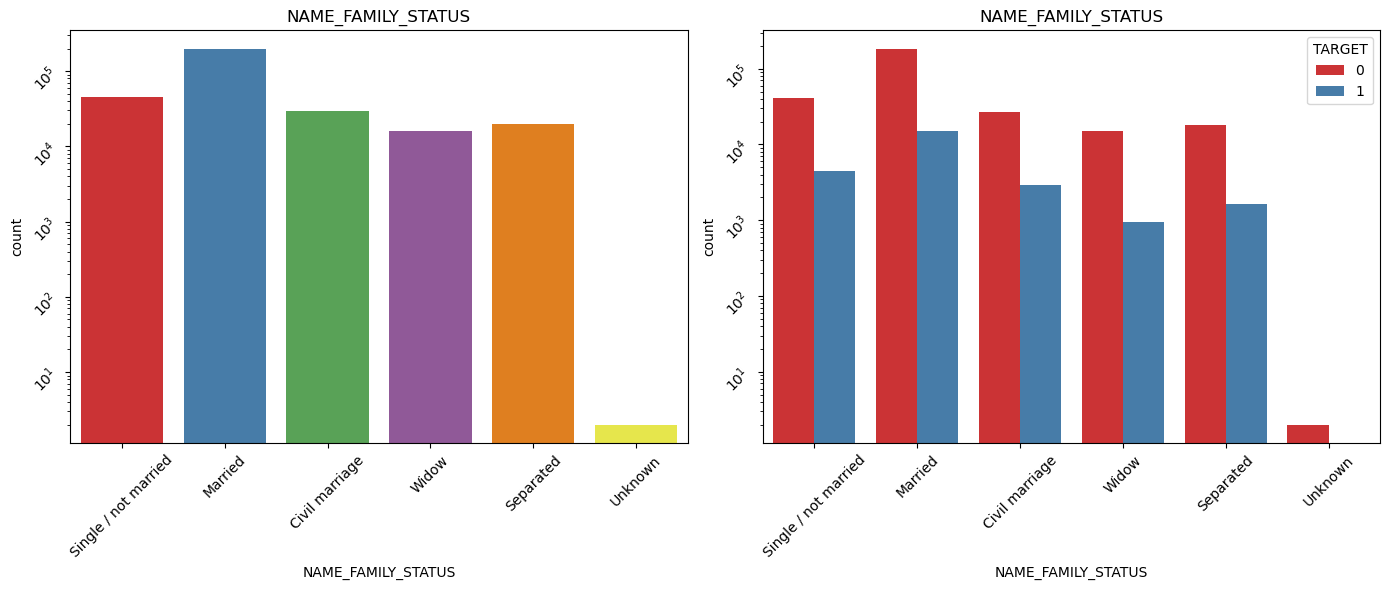

In [55]:
check_target(app_data,'NAME_FAMILY_STATUS',"NAME_FAMILY_STATUS")

In [ ]:
### Married has more defaulters and widow have less defaulters

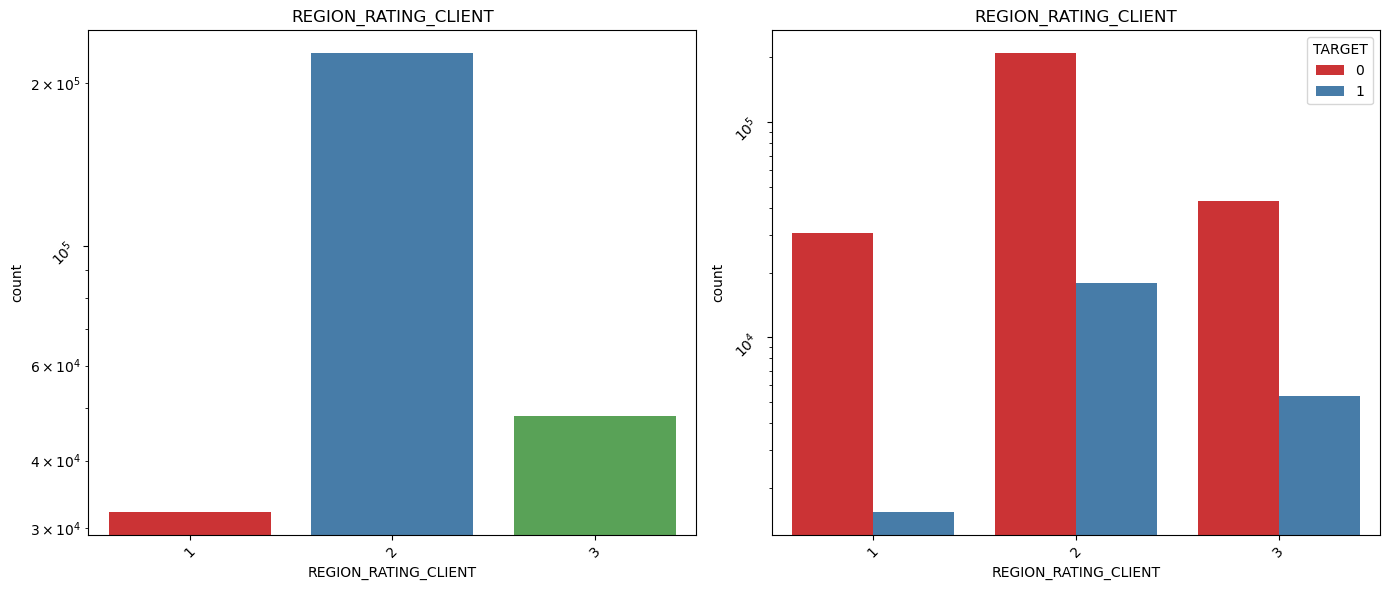

In [56]:
check_target(app_data,'REGION_RATING_CLIENT',"REGION_RATING_CLIENT")

In [ ]:
### Region 2 has more clients and 1 has less clients

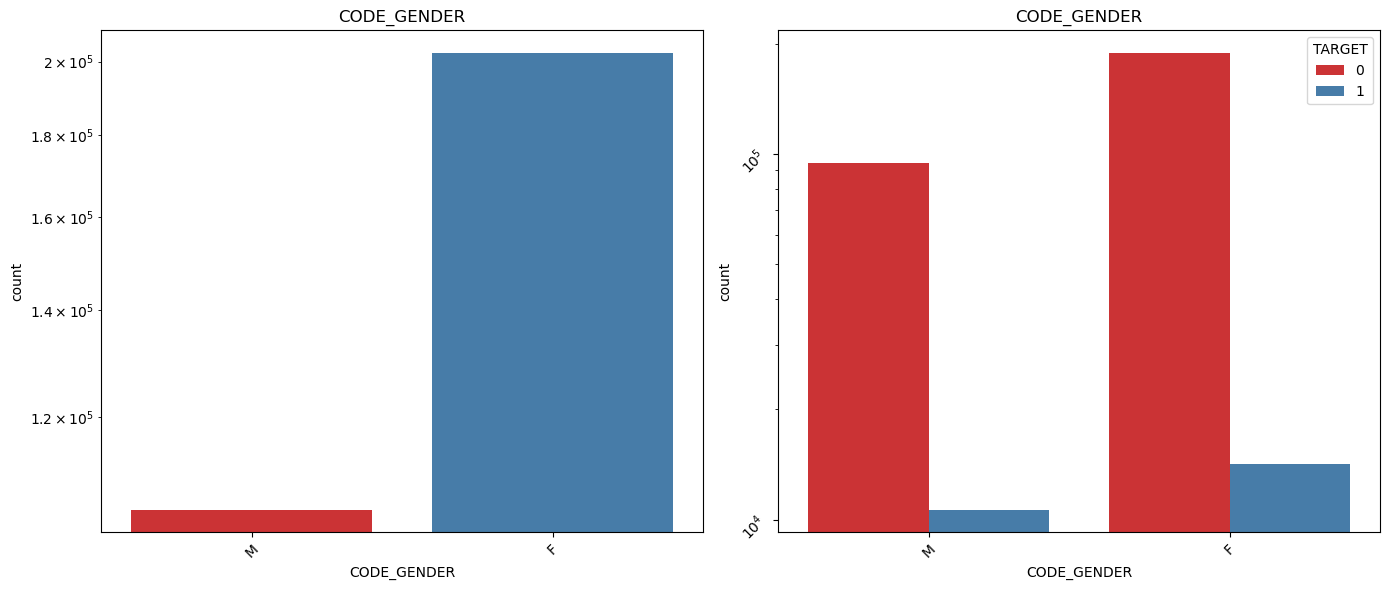

In [57]:
check_target(app_data,'CODE_GENDER',"CODE_GENDER")

In [ ]:
### Most percentaage of clients are female and they are active players

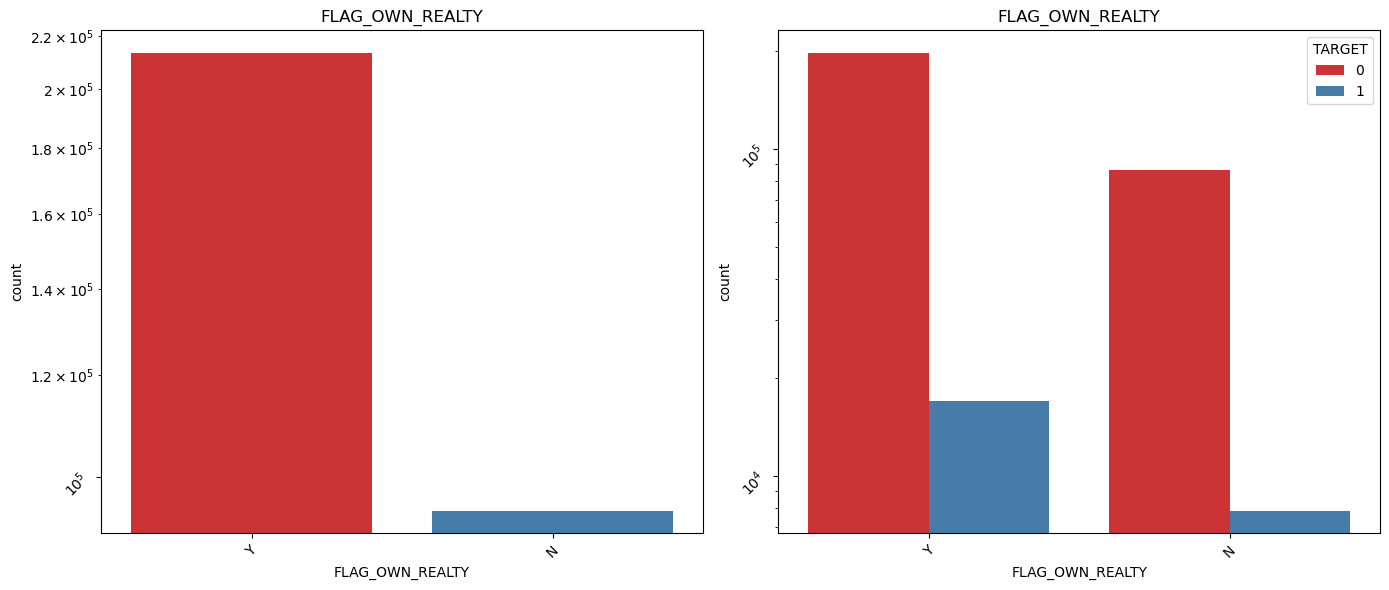

In [58]:
check_target(app_data,'FLAG_OWN_REALTY',"FLAG_OWN_REALTY")

In [ ]:
###Here me observe the more clients have house and proportional to repayer.

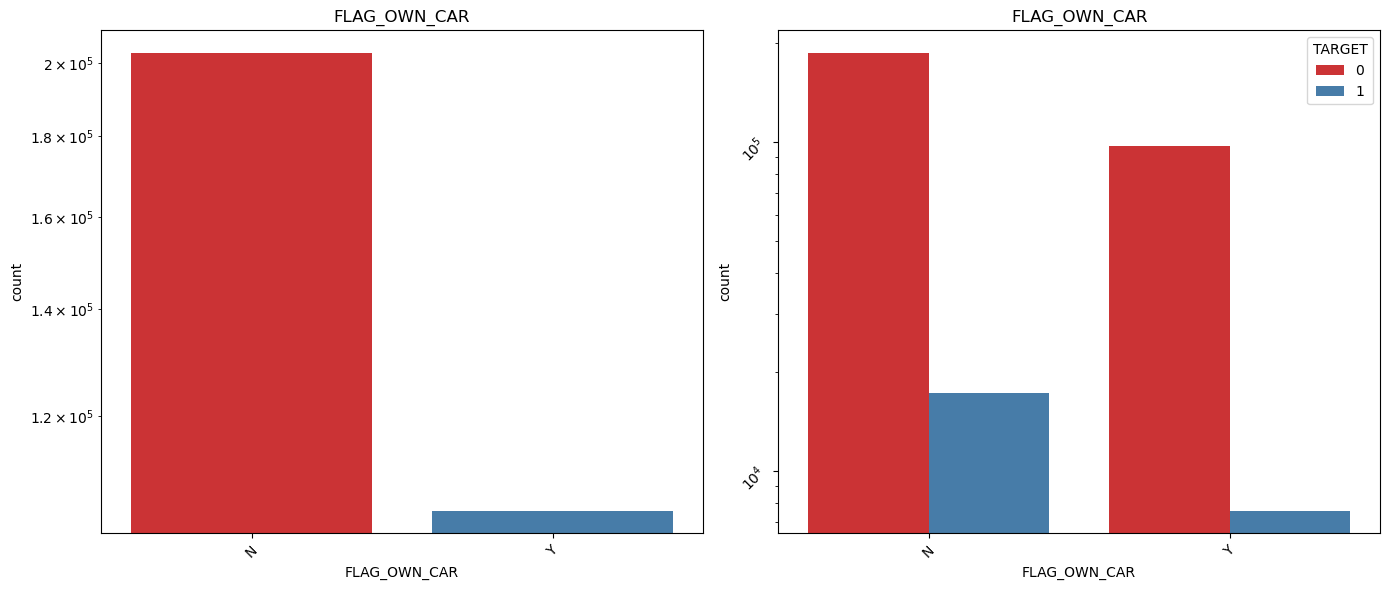

In [59]:
check_target(app_data,'FLAG_OWN_CAR','FLAG_OWN_CAR')

In [ ]:
### its complete opp to housing and less persons have cars.

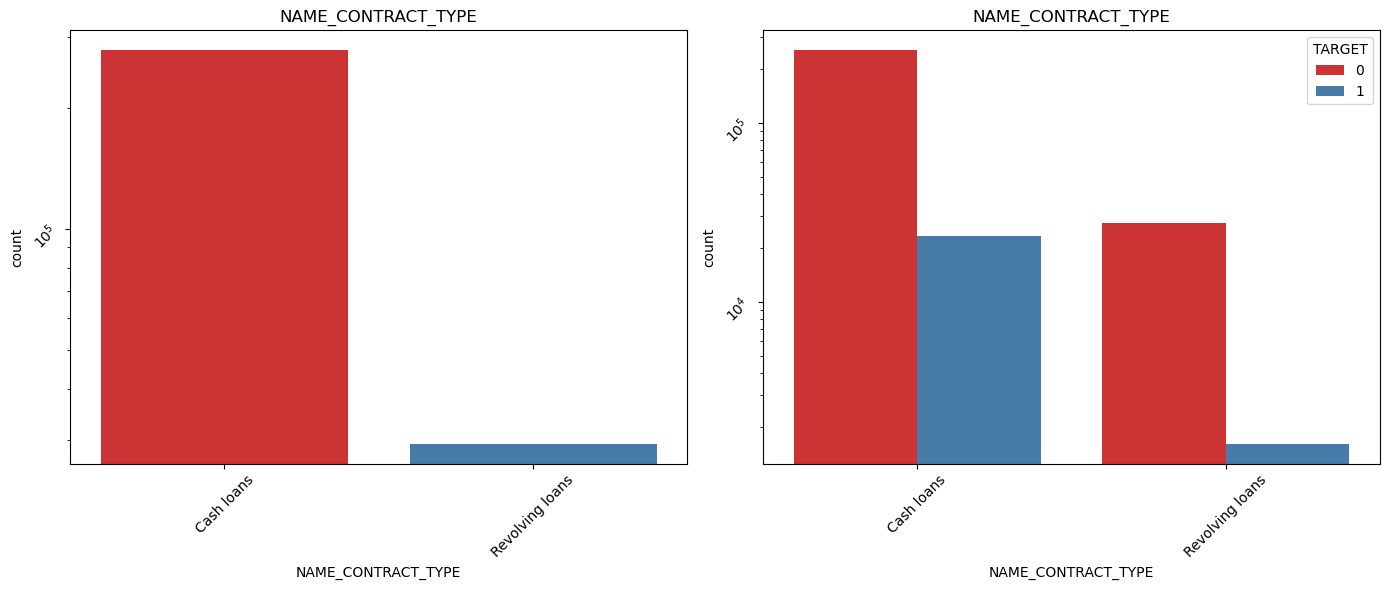

In [60]:
check_target(app_data,'NAME_CONTRACT_TYPE','NAME_CONTRACT_TYPE')

In [ ]:
### Cash loans are more in number

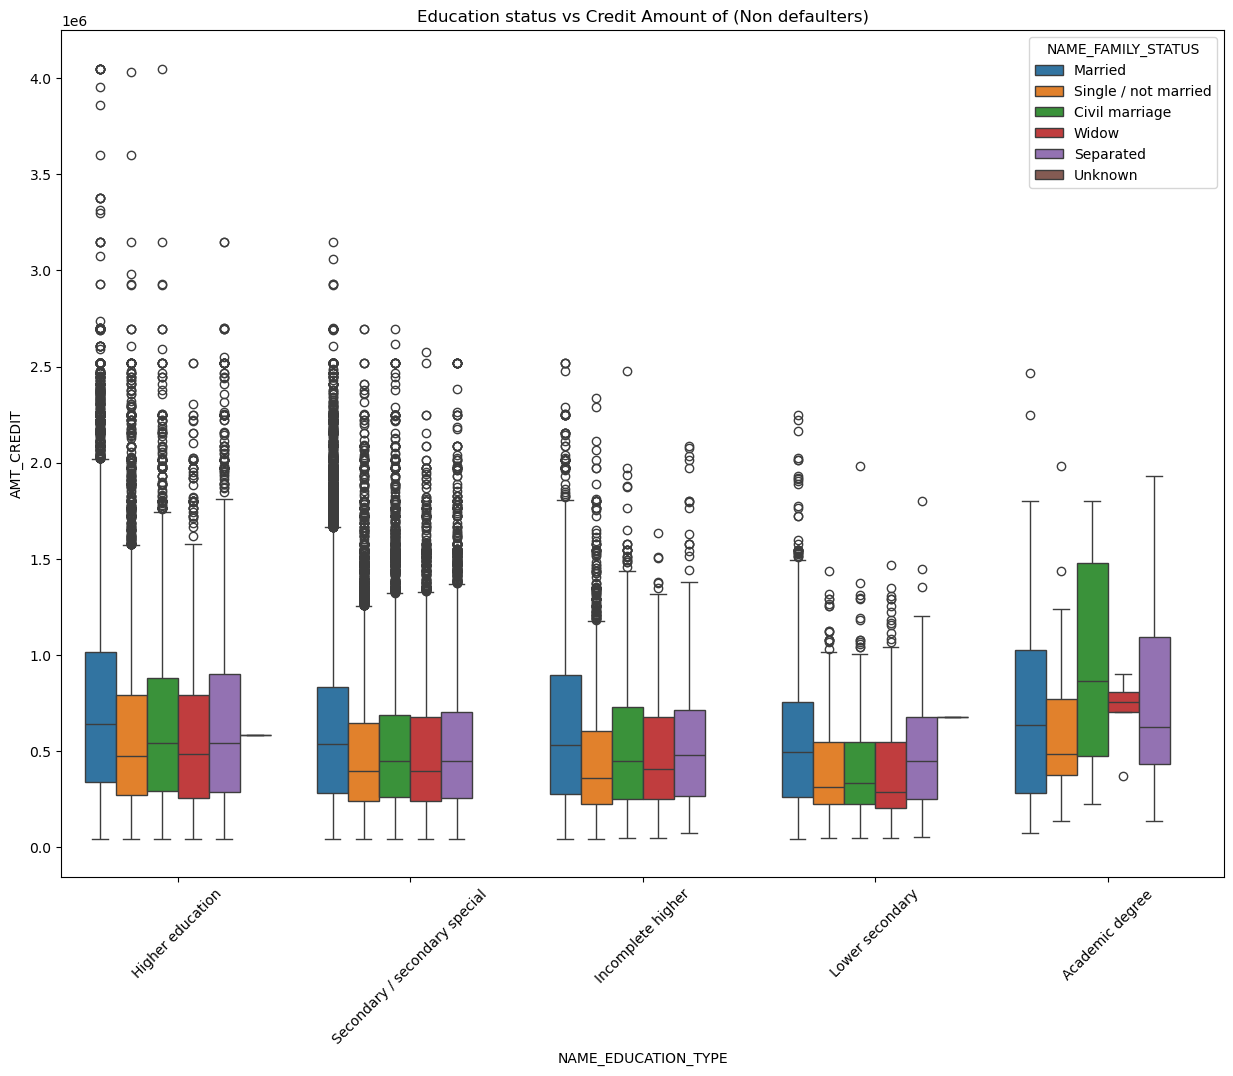

In [63]:
#Perform multivariate analysis for both family type and education type wrt target 0(Repayers)
plt.figure(figsize=(15,11))
plt.xticks(rotation=45)
sns.boxplot(data=app_data[app_data['TARGET']==0],x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Education status vs Credit Amount of (Non defaulters)')
plt.show()


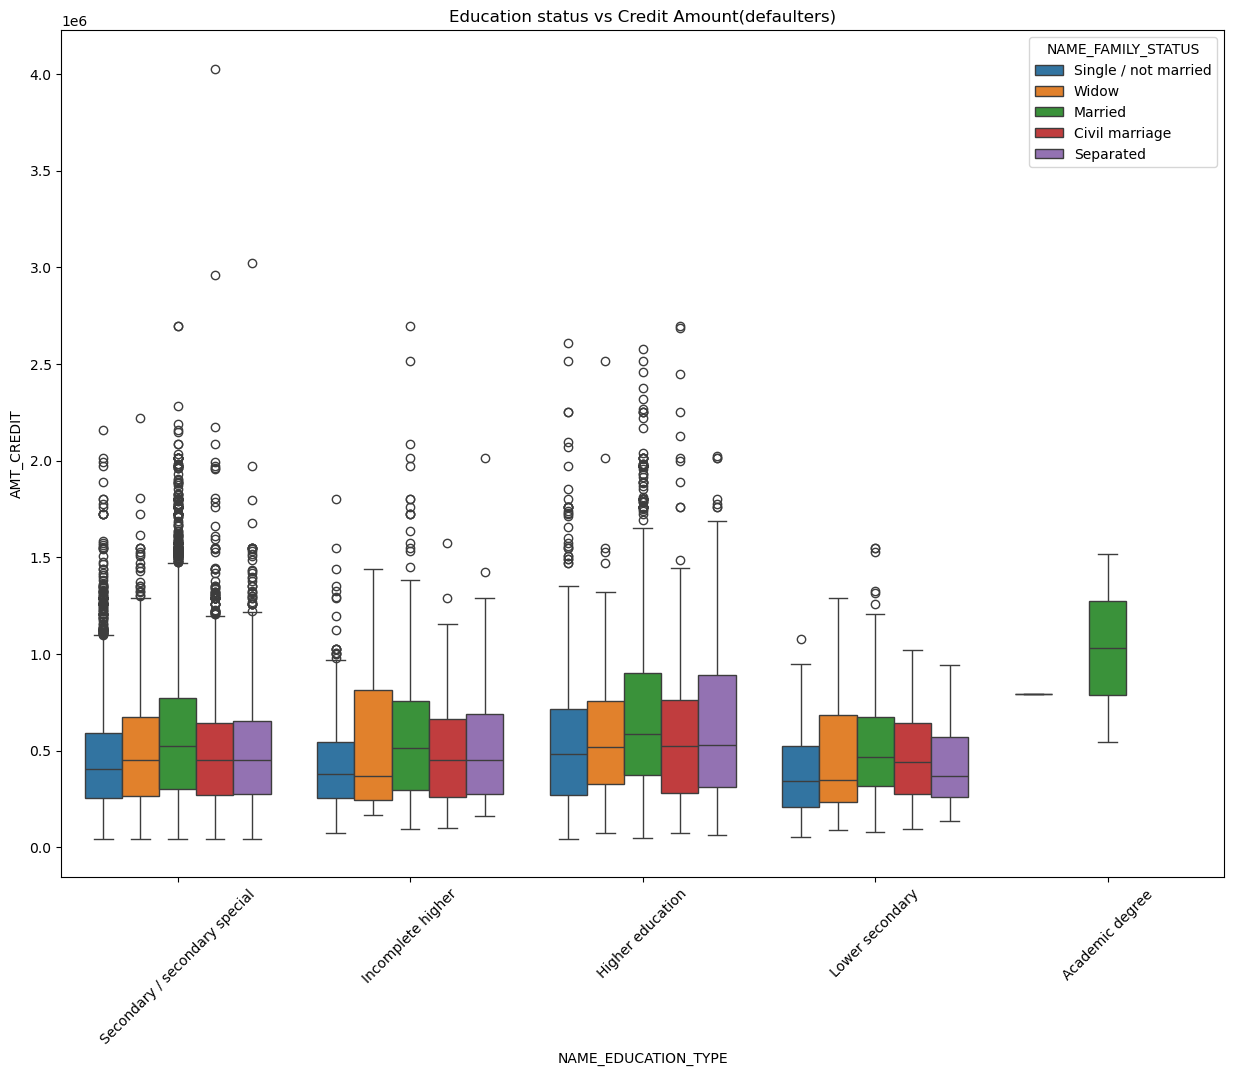

In [64]:
#Perform multivariate analysis for both family type and education type wrt target 1(Defaulters)
plt.figure(figsize=(15,11))
plt.xticks(rotation=45)
sns.boxplot(data=app_data[app_data['TARGET']==1],x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Education status vs Credit Amount(defaulters)')
plt.show()

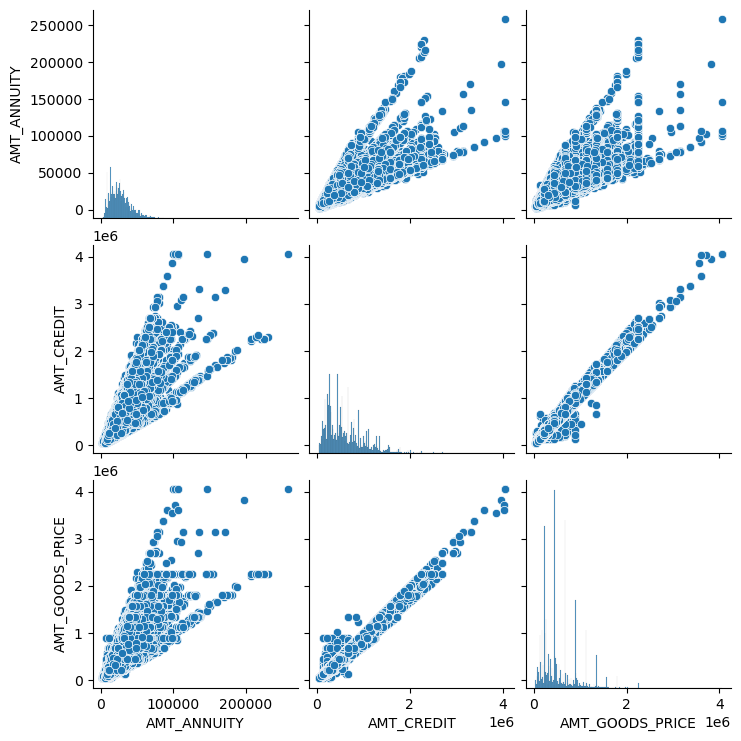

In [65]:
sns.pairplot(app_data[['AMT_ANNUITY','AMT_CREDIT','AMT_GOODS_PRICE']])
plt.show()

In [ ]:
### Here we get strong positive correlation between the loan request ,loan credited and loan for good purchase.

In [66]:
app_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_C

In [ ]:
### Here flag columns cause the unnecessary confusion better to drop for clear analysis

In [67]:
flag_columns=['FLAG_MOBIL','FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE','FLAG_EMAIL','FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12','FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18','FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']
app_data.drop(columns=flag_columns,inplace=True)

In [68]:
### take necessary columns into new data set for analysis
app_data1=app_data[['TARGET','SK_ID_CURR','CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION','DAYS_ID_PUBLISH', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','EXT_SOURCE_2', 'EXT_SOURCE_3','AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']]

In [69]:
app_data1.dtypes

TARGET                           int64
SK_ID_CURR                       int64
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
REGION_POPULATION_RELATIVE     float64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
CNT_FAM_MEMBERS                float64
REGION_RATING_CLIENT             int64
REGION_RATING_CLIENT_W_CITY      int64
EXT_SOURCE_2                   float64
EXT_SOURCE_3                   float64
AMT_REQ_CREDIT_BUREAU_HOUR     float64
AMT_REQ_CREDIT_BUREAU_DAY      float64
AMT_REQ_CREDIT_BUREAU_WEEK     float64
AMT_REQ_CREDIT_BUREAU_MON      float64
AMT_REQ_CREDIT_BUREAU_QRT      float64
AMT_REQ_CREDIT_BUREAU_YEAR     float64
dtype: object

In [70]:
#Seperate the defaulters and non defaulters for better analysis with all the other columns.
target0=app_data1[app_data1['TARGET']==0]
target1=app_data1[app_data1['TARGET']==1]

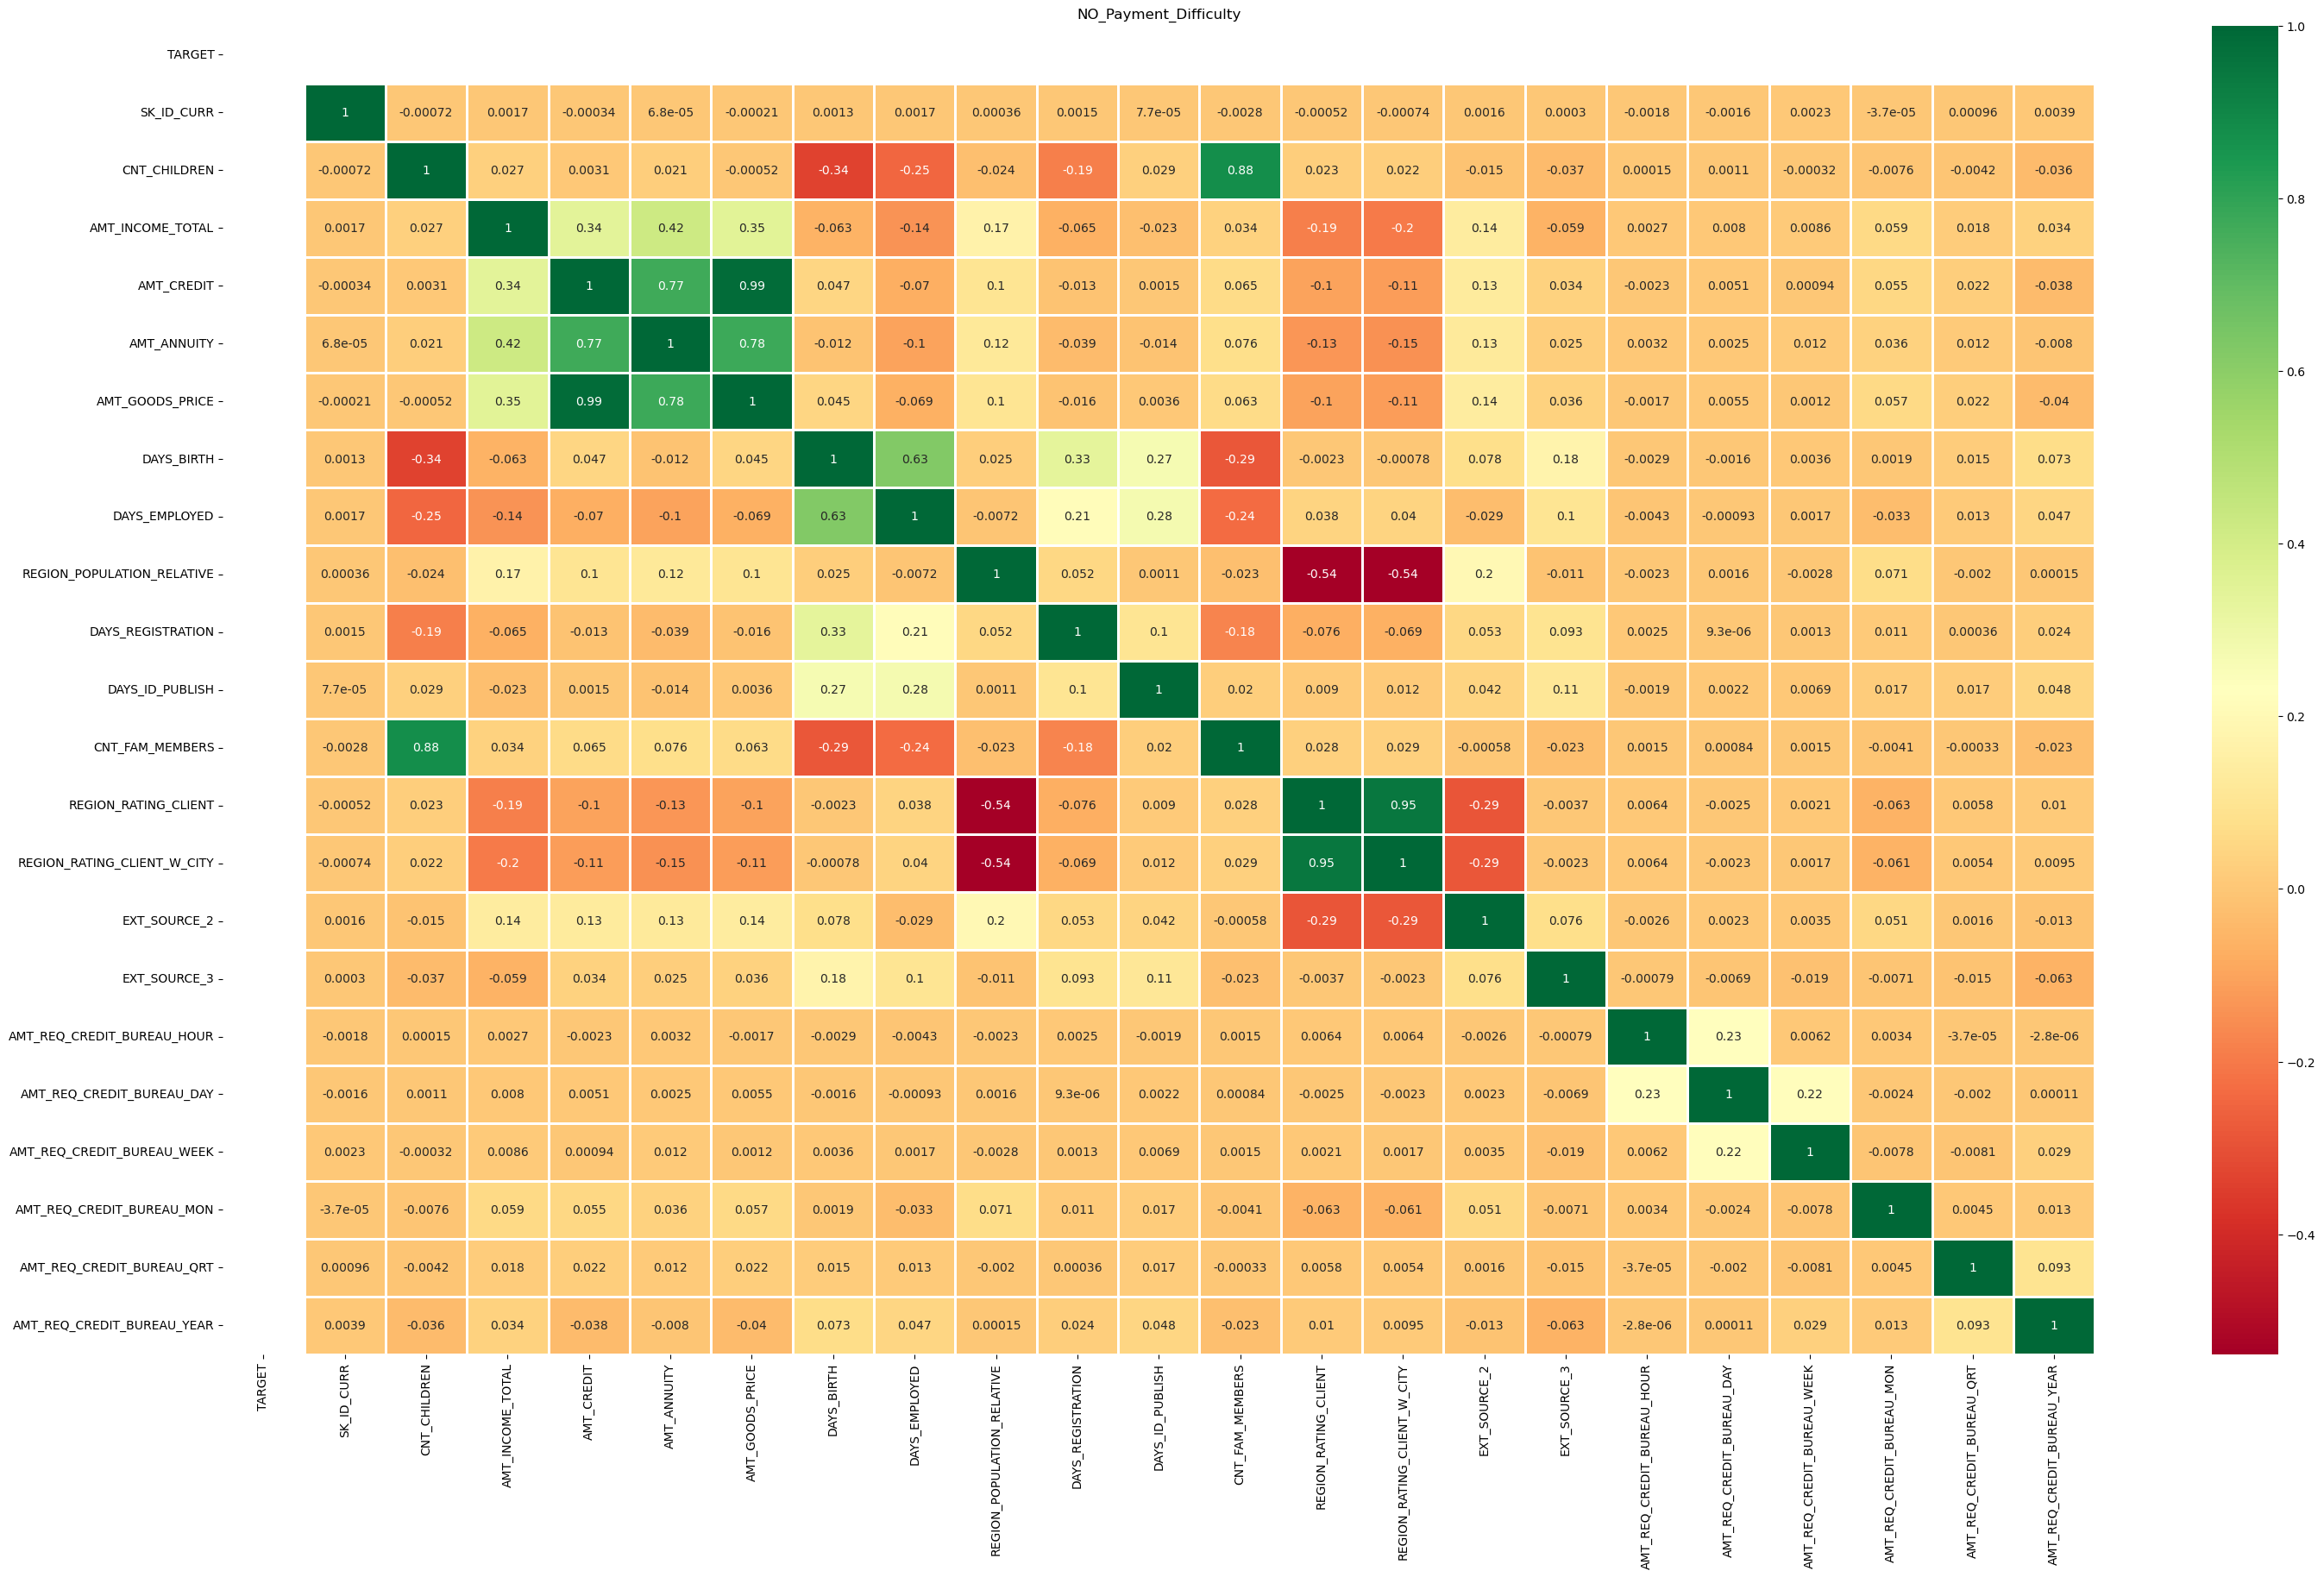

In [71]:
#Non defaulters with all others
plt.figure(figsize=(35, 20))
sns.heatmap(target0.corr(),cmap="RdYlGn",annot=True,linewidth =1)
plt.title('NO_Payment_Difficulty')
plt.show()

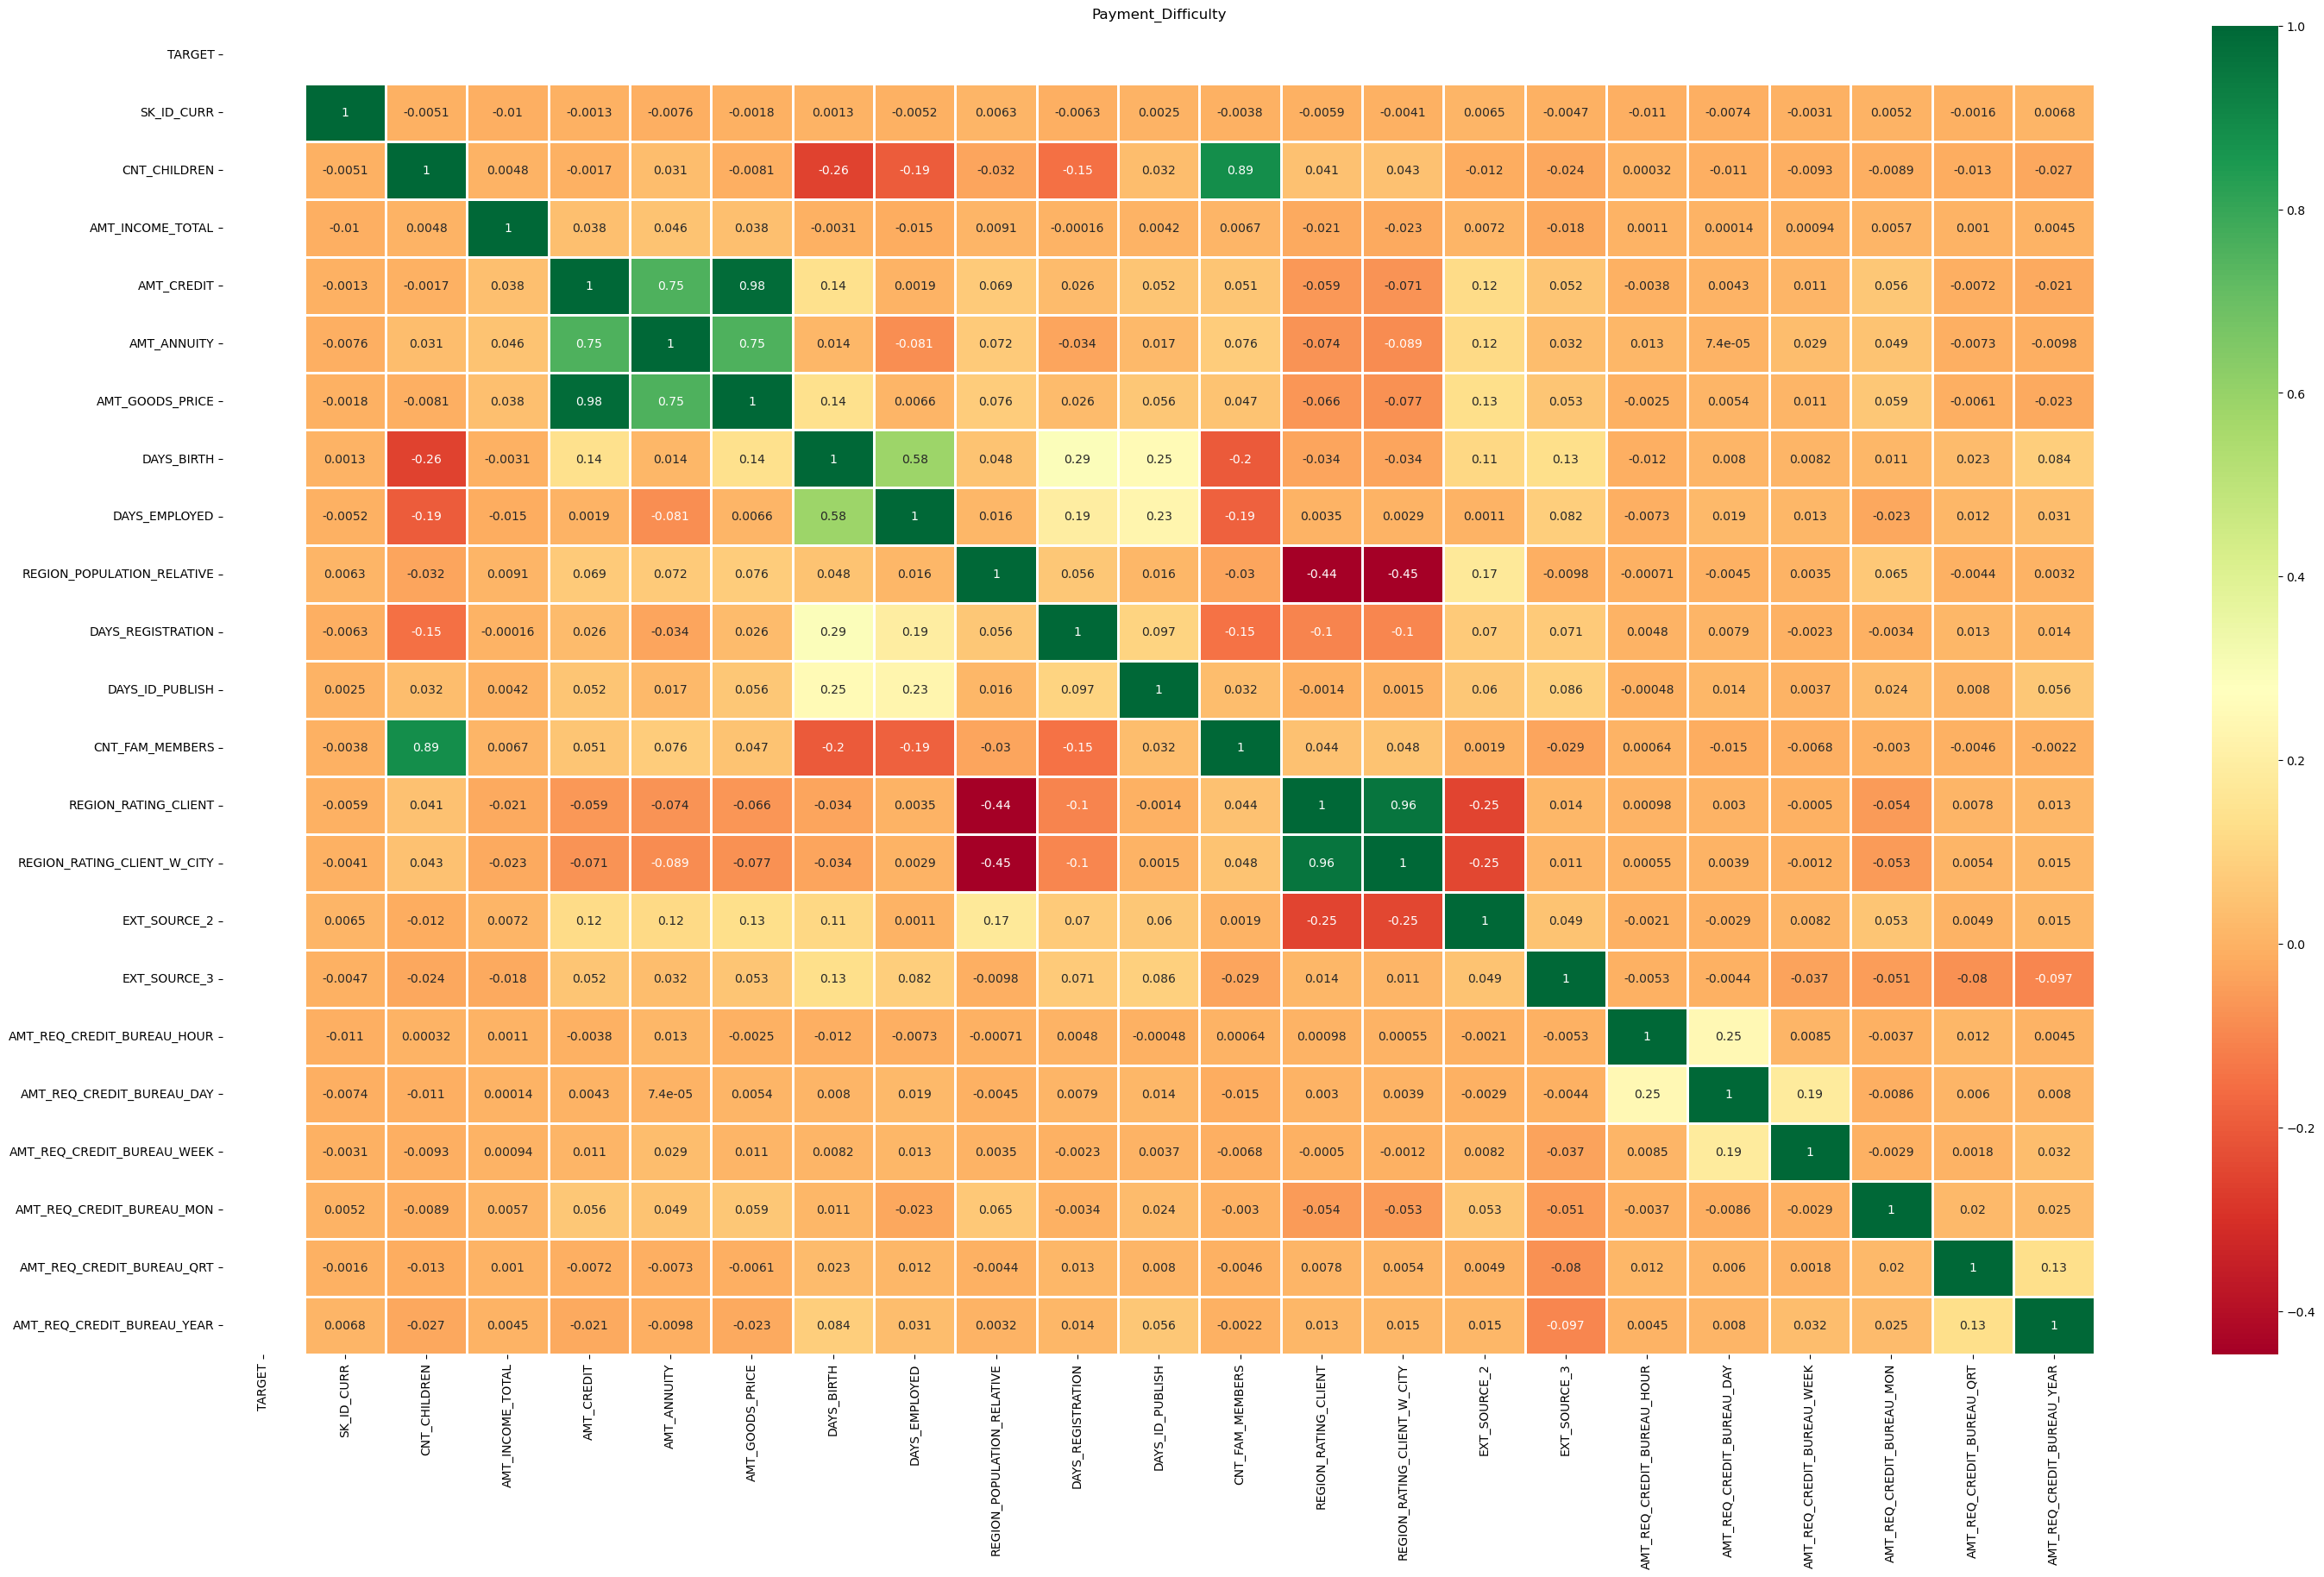

In [72]:
#Defaulter with all others
plt.figure(figsize=(35, 20))
sns.heatmap(target1.corr(),cmap="RdYlGn",annot=True,linewidth =1)
plt.title('Payment_Difficulty')
plt.show()

In [ ]:
### By observing both graphs we find the amount credit and goods price show strong positive correlation.

In [73]:
## Import previous data set  to analysis
pre_data=pd.read_csv(R"C:\Users\kvsba\Downloads\EDA Credit Case Study\previous_application.csv")

In [74]:
pre_data.head(500)

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0       2030495      271877     Consumer loans     1730.430        17145.000   
1       2802425      108129         Cash loans    25188.615       607500.000   
2       2523466      122040         Cash loans    15060.735       112500.000   
3       2819243      176158         Cash loans    47041.335       450000.000   
4       1784265      202054         Cash loans    31924.395       337500.000   
5       1383531      199383         Cash loans    23703.930       315000.000   
6       2315218      175704         Cash loans          NaN            0.000   
7       1656711      296299         Cash loans          NaN            0.000   
8       2367563      342292         Cash loans          NaN            0.000   
9       2579447      334349         Cash loans          NaN            0.000   
10      1715995      447712         Cash loans    11368.620       270000.000   
11      2257824      161140         Cash loans    13832.775       211500.000   
12      2330894      258628         Cash loans    12165.210       148500.000   
13      1397919      321676     Consumer loans     7654.860        53779.500   
14      2273188      270658     Consumer loans     9644.220        26550.000   
15      1232483      151612     Consumer loans    21307.455       126490.500   
16      2163253      154602     Consumer loans     4187.340        26955.000   
17      1285768      142748    Revolving loans     9000.000       180000.000   
18      2393109      396305         Cash loans    10181.700       180000.000   
19      1173070      199178         Cash loans     4666.500        45000.000   
20      1506815      166490         Cash loans    25454.025       450000.000   
21      1182516      267782         Cash loans    20361.600       405000.000   
22      1172842      302212         Cash loans          NaN            0.000   
23      1172937      302212         Cash loans    39475.305      1129500.000   
24      1555330      199353         Cash loans          NaN            0.000   
25      1543131      275707         Cash loans    22619.520       229500.000   
26      2536650      338725         Cash loans    16708.320       369000.000   
27      1676258      433469         Cash loans    22242.825       247500.000   
28      2075578      418383     Consumer loans     7656.705        74610.000   
29      1583704      315664         Cash loans          NaN            0.000   
30      2138466      170289     Consumer loans     3286.485        32562.000   
31      2191093      182450     Consumer loans     9789.255       100485.000   
32      1471931      257846         Cash loans          NaN            0.000   
33      1478703      393511         Cash loans          NaN            0.000   
34      1629736      255331    Revolving loans    10125.000       202500.000   
35      2027074      208000     Consumer loans    12065.535        56655.000   
36      2766278      178375     Consumer loans     7511.085        32490.000   
37      1151694      161591     Consumer loans    39111.075       214380.000   
38      1692577      125157     Consumer loans     9946.485        99319.500   
39      2740958      281589     Consumer loans     6752.250        35955.000   
40      2317570      258076     Consumer loans     4539.285        18360.000   
41      1366380      247572     Consumer loans          NaN        17950.500   
42      2319873      188414     Consumer loans     3560.715        71356.500   
43      2057616      304455     Consumer loans    15542.730       129505.500   
44      2675386      118974     Consumer loans     6899.490        55831.500   
45      2621158      281470    Revolving loans    14625.000       292500.000   
46      2586290      447421     Consumer loans    10274.040       126544.500   
47      1475738      235737         Cash loans    75897.630      2025000.000   
48      2600277      256517         Cash loans          NaN            0.000   
49   

In [75]:
pre_data.shape

(1670214, 37)

In [76]:
pre_data.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [77]:
#Removing columns have more than 40 percent of null values
pre_data.columns[(pre_data.isnull().sum()/pre_data.shape[0]*100)>40]

Index(['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_TYPE_SUITE', 'DAYS_FIRST_DRAWING',
       'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE',
       'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [78]:
drop1=pre_data.columns[(pre_data.isnull().sum()/pre_data.shape[0]*100)>40]

In [79]:
pre_data.drop(columns=drop1,axis=1,inplace=True)

In [80]:
pre_data.isnull().sum().sort_values(ascending=False)

AMT_GOODS_PRICE                385515
AMT_ANNUITY                    372235
CNT_PAYMENT                    372230
PRODUCT_COMBINATION               346
AMT_CREDIT                          1
CODE_REJECT_REASON                  0
NAME_YIELD_GROUP                    0
NAME_SELLER_INDUSTRY                0
SELLERPLACE_AREA                    0
CHANNEL_TYPE                        0
NAME_PRODUCT_TYPE                   0
NAME_PORTFOLIO                      0
NAME_GOODS_CATEGORY                 0
NAME_CLIENT_TYPE                    0
SK_ID_PREV                          0
NAME_PAYMENT_TYPE                   0
SK_ID_CURR                          0
NAME_CONTRACT_STATUS                0
NAME_CASH_LOAN_PURPOSE              0
NFLAG_LAST_APPL_IN_DAY              0
FLAG_LAST_APPL_PER_CONTRACT         0
HOUR_APPR_PROCESS_START             0
WEEKDAY_APPR_PROCESS_START          0
AMT_APPLICATION                     0
NAME_CONTRACT_TYPE                  0
DAYS_DECISION                       0
dtype: int64

In [81]:
pre_data['AMT_GOODS_PRICE'].value_counts()

AMT_GOODS_PRICE
45000.00     47831
225000.00    43549
135000.00    40666
450000.00    38926
90000.00     29367
             ...  
185292.00        1
225054.00        1
156212.55        1
99896.31         1
267295.50        1
Name: count, Length: 93885, dtype: int64

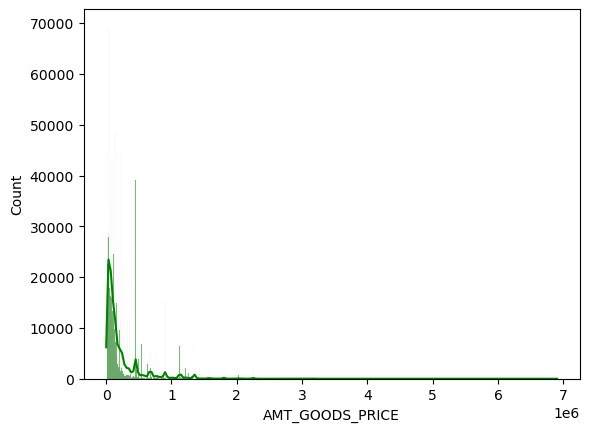

In [82]:
sns.histplot(pre_data,x=pre_data['AMT_GOODS_PRICE'],kde=True,color='g')
plt.show()

In [ ]:
# Here amount goods price shows a positive skewed than replace it to median

In [83]:
pre_data['AMT_GOODS_PRICE'].median()

112320.0

In [85]:
AM=pre_data['AMT_GOODS_PRICE'].median()

In [86]:
pre_data['AMT_GOODS_PRICE'].fillna(AM,inplace=True)

In [87]:
pre_data['AMT_GOODS_PRICE'].value_counts()

AMT_GOODS_PRICE
112320.00    385545
45000.00      47831
225000.00     43549
135000.00     40666
450000.00     38926
              ...  
185292.00         1
225054.00         1
156212.55         1
99896.31          1
267295.50         1
Name: count, Length: 93885, dtype: int64

In [88]:
pre_data['AMT_ANNUITY'].value_counts()

AMT_ANNUITY
2250.000     31865
11250.000    13974
6750.000     13442
9000.000     12496
22500.000    11903
             ...  
3794.445         1
8723.160         1
27948.330        1
25374.285        1
14704.290        1
Name: count, Length: 357959, dtype: int64

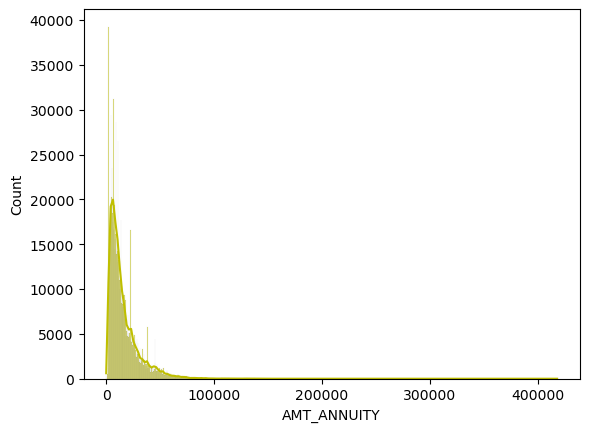

In [89]:
sns.histplot(pre_data,x=pre_data['AMT_ANNUITY'],kde=True,color='y')
plt.show()

In [90]:
## Here also median is best option.
pre_data['AMT_ANNUITY'].median()

11250.0

In [91]:
AA=pre_data['AMT_ANNUITY'].median()

In [92]:
pre_data['AMT_ANNUITY'].fillna(AA,inplace=True)

In [93]:
pre_data['PRODUCT_COMBINATION'].value_counts()

PRODUCT_COMBINATION
Cash                              285990
POS household with interest       263622
POS mobile with interest          220670
Cash X-Sell: middle               143883
Cash X-Sell: low                  130248
Card Street                       112582
POS industry with interest         98833
POS household without interest     82908
Card X-Sell                        80582
Cash Street: high                  59639
Cash X-Sell: high                  59301
Cash Street: middle                34658
Cash Street: low                   33834
POS mobile without interest        24082
POS other with interest            23879
POS industry without interest      12602
POS others without interest         2555
Name: count, dtype: int64

In [138]:
#Here null values are very less than filling mode is better choice.
pre_data['PRODUCT_COMBINATION'].fillna('Cash',inplace=True)

In [95]:
pre_data['PRODUCT_COMBINATION'].value_counts()

PRODUCT_COMBINATION
Cash                              285990
POS household with interest       263622
POS mobile with interest          220670
Cash X-Sell: middle               143883
Cash X-Sell: low                  130248
Card Street                       112582
POS industry with interest         98833
POS household without interest     82908
Card X-Sell                        80582
Cash Street: high                  59639
Cash X-Sell: high                  59301
Cash Street: middle                34658
Cash Street: low                   33834
POS mobile without interest        24082
POS other with interest            23879
POS industry without interest      12602
POS others without interest         2555
Unknown                              346
Name: count, dtype: int64

In [96]:
pre_data['PRODUCT_COMBINATION'].isnull().sum() ## checking

0

In [97]:
pre_data['CNT_PAYMENT'].value_counts()

CNT_PAYMENT
12.0    323049
6.0     190461
0.0     144985
10.0    141851
24.0    137764
18.0     77430
36.0     72583
60.0     53600
48.0     47316
8.0      30349
4.0      26924
30.0     16924
14.0      8253
42.0      7136
16.0      5710
5.0       3957
54.0      2104
20.0      1805
7.0       1434
9.0       1236
3.0       1100
15.0       904
11.0       669
72.0       139
13.0        51
17.0        48
84.0        45
22.0        37
23.0        27
26.0        13
35.0        11
66.0        10
28.0         8
29.0         8
32.0         6
19.0         6
34.0         4
59.0         4
41.0         3
47.0         3
45.0         3
21.0         3
44.0         2
39.0         2
46.0         2
38.0         2
33.0         1
40.0         1
53.0         1
Name: count, dtype: int64

In [98]:
pre_data['CNT_PAYMENT'].median()

12.0

In [107]:
m=pre_data['CNT_PAYMENT'].median()

In [99]:
pre_data['CNT_PAYMENT'].mean()

16.0540815603274

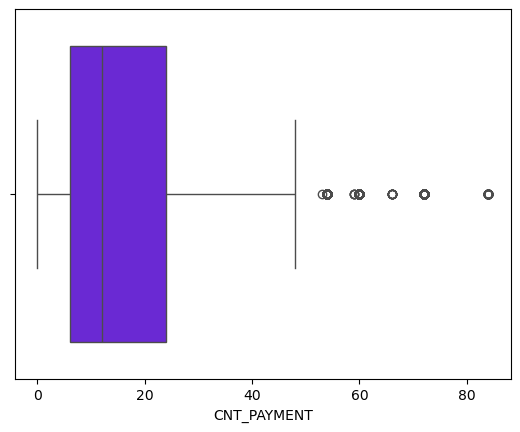

In [106]:
sns.boxplot(pre_data,x=pre_data['CNT_PAYMENT'],color='#630cf0')
plt.show()

In [ ]:
## It shows outliers so filled with median is better than mean.

In [108]:
pre_data['CNT_PAYMENT'].fillna(m,inplace=True)

In [109]:
pre_data.isnull().sum()

SK_ID_PREV                     0
SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_ANNUITY                    0
AMT_APPLICATION                0
AMT_CREDIT                     1
AMT_GOODS_PRICE                0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
FLAG_LAST_APPL_PER_CONTRACT    0
NFLAG_LAST_APPL_IN_DAY         0
NAME_CASH_LOAN_PURPOSE         0
NAME_CONTRACT_STATUS           0
DAYS_DECISION                  0
NAME_PAYMENT_TYPE              0
CODE_REJECT_REASON             0
NAME_CLIENT_TYPE               0
NAME_GOODS_CATEGORY            0
NAME_PORTFOLIO                 0
NAME_PRODUCT_TYPE              0
CHANNEL_TYPE                   0
SELLERPLACE_AREA               0
NAME_SELLER_INDUSTRY           0
CNT_PAYMENT                    0
NAME_YIELD_GROUP               0
PRODUCT_COMBINATION            0
dtype: int64

In [110]:
### merge the two data sets to perform the combine analysis.

new_data = pd.merge(app_data, pre_data, how='inner', on='SK_ID_CURR')
new_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0      100002       1           Cash loans           M            N   
1      100003       0           Cash loans           F            N   
2      100003       0           Cash loans           F            N   
3      100003       0           Cash loans           F            N   
4      100004       0      Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
0               Y             0          202500.0      406597.5   
1               N             0          270000.0     1293502.5   
2               N             0          270000.0     1293502.5   
3               N             0          270000.0     1293502.5   
4               Y             0           67500.0      135000.0   

   AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0        24700.5           351000.0   Unaccompanied          Working   
1        35698.5          1129500.0          Family    State servant   
2        35698.5          1129500.0          Family    State servant   
3        35698.5          1129500.0          Family    State servant   
4         6750.0           135000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2               Higher education               Married  House / apartment   
3               Higher education               Married  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801        9461            637             3648.0   
1                    0.003541       16765           1188             1186.0   
2                    0.003541       16765           1188             1186.0   
3                    0.003541       16765           1188             1186.0   
4                    0.010032       19046            225             4260.0   

   DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0             2120        Laborers              1.0                     2   
1              291      Core staff              2.0                     1   
2              291      Core staff              2.0                     1   
3              291      Core staff              2.0                     1   
4             2531        Laborers              1.0                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START_x  \
0                            2                    WEDNESDAY   
1                            1                       MONDAY   
2                            1                       MONDAY   
3                            1                       MONDAY   
4                            2                       MONDAY   

   HOUR_APPR_PROCESS_START_x  REG_REGION_NOT_LIVE_REGION  \
0                         10                           0   
1                         11                           0   
2                         11                           0   
3                         11                           0   
4                          9                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                     

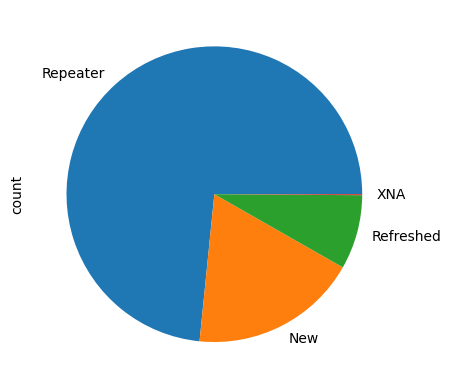

In [116]:
# IT shows the type of client when applying previous application.
new_data["NAME_CLIENT_TYPE"].value_counts().plot.pie()
plt.show()

In [111]:
new_data.shape

(1413701, 72)

In [ ]:
### In the combine new data set we perform univarient analysis wrt target variable.

In [120]:
def check_target2(new_data,column1,column2=None):
    fig, axes=plt.subplots(1, 2, figsize=(14,6))
    sns.countplot(data=new_data,x=column1,palette="Paired",ax=axes[0])
    axes[0].set_title(f'{column1}')
    axes[0].set_xlabel(column1)
    axes[0].set_yscale("log")
    axes[0].set_ylabel("count")
    axes[0].tick_params(rotation=45)
    if column2:
        sns.countplot(data=new_data,x=column2,hue="TARGET",palette="Paired",ax=axes[1])
        axes[1].set_title(f'{column2}')
        axes[1].set_xlabel(column2)
        axes[1].set_yscale("log")
        axes[1].set_ylabel("count")
        axes[1].tick_params(rotation=45)
    plt.tight_layout()
    plt.show()

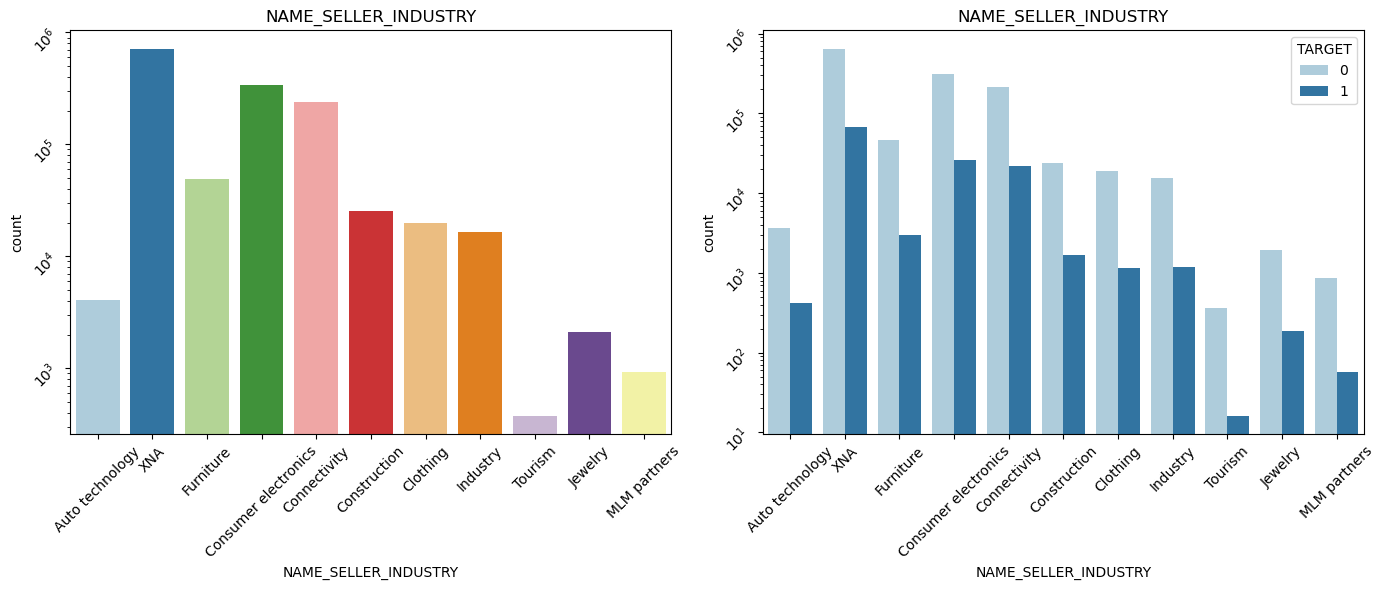

In [121]:
check_target2(new_data,'NAME_SELLER_INDUSTRY',"NAME_SELLER_INDUSTRY")

In [ ]:
### Consumer electronics and connectivity are more targetable industry

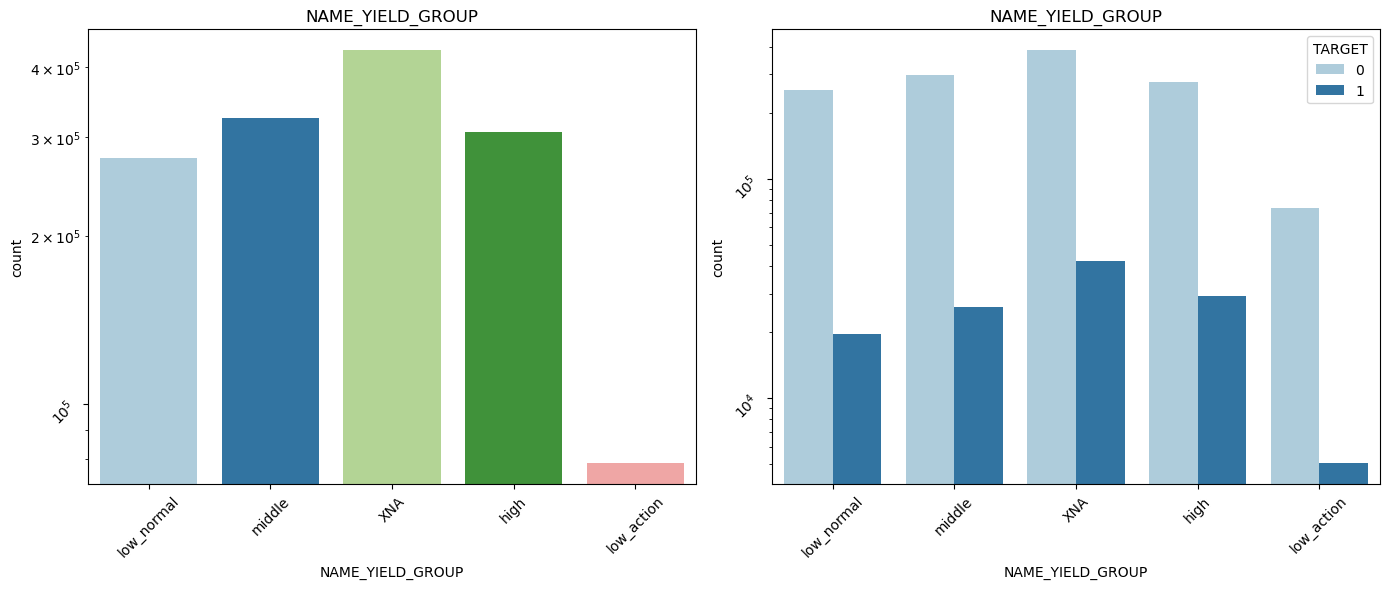

In [122]:
check_target2(new_data,'NAME_YIELD_GROUP',"NAME_YIELD_GROUP")

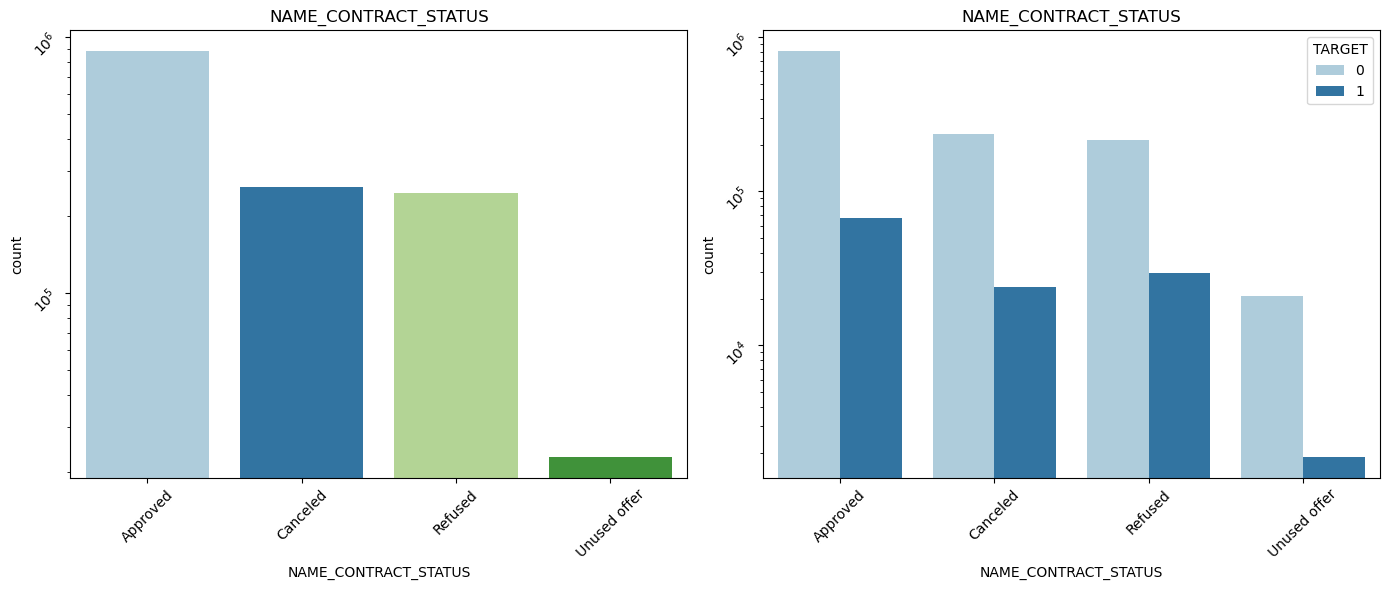

In [123]:
check_target2(new_data,'NAME_CONTRACT_STATUS',"NAME_CONTRACT_STATUS")

In [ ]:
# In the previous loan clients with  canceled,refused and unused offer are more no of percent are repayers.

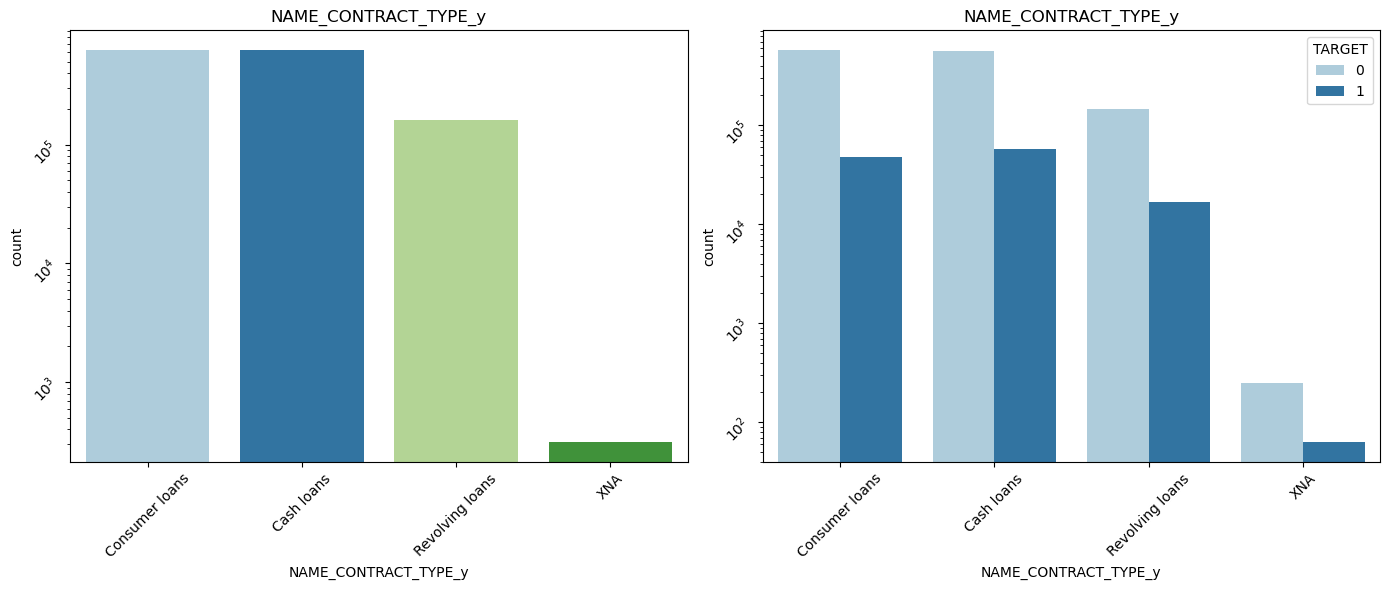

In [124]:
check_target2(new_data,'NAME_CONTRACT_TYPE_y',"NAME_CONTRACT_TYPE_y")

In [ ]:
## In consumer and cash loans contain more defaulters parallely double check before process the loan.

<Figure size 1400x900 with 0 Axes>

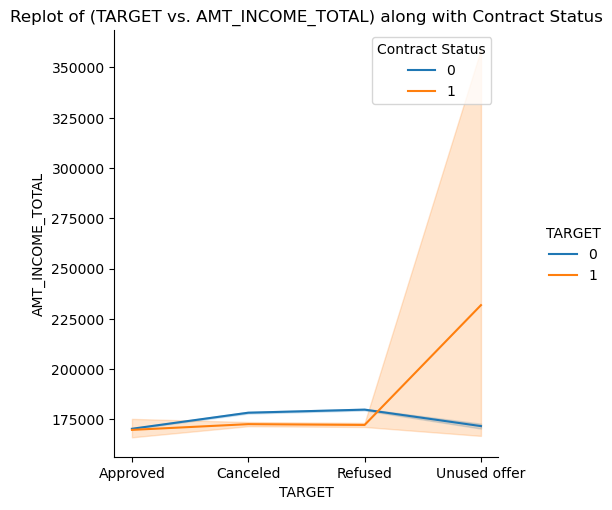

In [129]:
plt.figure(figsize=(14, 9))
sns.relplot(data=new_data, x="NAME_CONTRACT_STATUS", y="AMT_INCOME_TOTAL", hue="TARGET",kind="line")

# Customize the plot
plt.title("Replot of (TARGET vs. AMT_INCOME_TOTAL) along with Contract Status")
plt.xlabel("TARGET")
plt.ylabel("AMT_INCOME_TOTAL")
plt.legend(title="Contract Status")

# Show the plot
plt.show()

In [ ]:
## The above graph provide a insight of previous unused offer persons contain high defaulter even though they earn more amount of income.